In [1]:
import csv
import ndjson
import os
import sys

In [2]:
root_path = os.getcwd().split('notebook')[0]

In [3]:
sys.path.insert(1, root_path)
from src.utils.model_utils import *
from src.draw_model import *

In [4]:
config = ConfigParser()
config_file = "config.cfg"
config_path = os.path.join(root_path + "src" + "\\" + config_file)
config.read_file(open(config_path))

In [5]:
categories_file = os.path.join(root_path, 'src\\data\\categories.csv')

In [6]:
with open(categories_file, newline='') as f:
    reader = csv.reader(f)
    categories = {rows[0]:rows[0] for rows in reader}

#### Select a category to download images from 

In [7]:
for key, value in categories.items():
    #print(key)
    pass

In [8]:
print("Selected category from the list above:")
#category=input()
category='moon'
print(category)

Selected category from the list above:
moon


In [9]:
print("Creating directories to save images, weights and the model ...")
src_list, dst_list, paths_dict = create_folders(root_path, categories, category)

for (src_file, dst_file) in zip(src_list, dst_list): 
    print('src_file: {}, dst_file: {}'.format(src_file, dst_file))

Creating directories to save images, weights and the model ...
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data folder exists...
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\save folder exists...
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\input folder exists...
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output folder exists...
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images folder exists...
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\positions folder exists...
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\raw folder exists...
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\save\moon folder exists...
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\input\moon folder exists...
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\raw\moon folder exists...
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\moon folder exists...
src_file: gs://quickdraw_dataset/full/numpy_bitmap/mo

In [10]:
for (src_file, dst_file) in zip(src_list, dst_list): 
    !gsutil -m cp {src_file} {dst_file}

Copying gs://quickdraw_dataset/full/numpy_bitmap/moon.npy...
/ [0/1 files][    0.0 B/ 91.0 MiB]   0% Done                                    
-
- [0/1 files][  2.1 MiB/ 91.0 MiB]   2% Done                                    
\
\ [0/1 files][  9.8 MiB/ 91.0 MiB]  10% Done                                    
|
/
/ [0/1 files][ 18.0 MiB/ 91.0 MiB]  19% Done                                    
-
\
\ [0/1 files][ 26.0 MiB/ 91.0 MiB]  28% Done                                    
|
| [0/1 files][ 34.0 MiB/ 91.0 MiB]  37% Done                                    
/
-
- [0/1 files][ 42.0 MiB/ 91.0 MiB]  46% Done                                    
\
|
| [0/1 files][ 50.0 MiB/ 91.0 MiB]  54% Done                                    
/
/ [0/1 files][ 57.8 MiB/ 91.0 MiB]  63% Done                                    
-
\
\ [0/1 files][ 65.5 MiB/ 91.0 MiB]  71% Done                                    
|
/
/ [0/1 files][ 72.7 MiB/ 91.0 MiB]  79% Done                                    
-
- [0/1 files][

In [11]:
npy_data = np.load(paths_dict['base_input'] + '.npy', allow_pickle=True)

|
| [0/1 files][242.6 MiB/315.6 MiB]  76% Done   2.1 MiB/s ETA 00:00:35           
/
-
- [0/1 files][244.7 MiB/315.6 MiB]  77% Done   2.2 MiB/s ETA 00:00:32           
\
\ [0/1 files][247.5 MiB/315.6 MiB]  78% Done   2.4 MiB/s ETA 00:00:29           
|
/
/ [0/1 files][250.1 MiB/315.6 MiB]  79% Done   2.4 MiB/s ETA 00:00:27           
-
- [0/1 files][252.7 MiB/315.6 MiB]  80% Done   2.4 MiB/s ETA 00:00:26           
\
|
| [0/1 files][255.3 MiB/315.6 MiB]  80% Done   2.4 MiB/s ETA 00:00:26           
/
-
- [0/1 files][257.3 MiB/315.6 MiB]  81% Done   2.3 MiB/s ETA 00:00:25           
\
\ [0/1 files][259.6 MiB/315.6 MiB]  82% Done   2.2 MiB/s ETA 00:00:25           
|
/
/ [0/1 files][262.0 MiB/315.6 MiB]  83% Done   2.3 MiB/s ETA 00:00:23           
-
\
\ [0/1 files][264.0 MiB/315.6 MiB]  83% Done   2.1 MiB/s ETA 00:00:25           
|
| [0/1 files][265.8 MiB/315.6 MiB]  84% Done   2.0 MiB/s ETA 00:00:25           
/
-
- [0/1 files][268.2 MiB/315.6 MiB]  84% Done   2.0 MiB/s ETA 00:00:24  

In [12]:
# load from file-like objects
with open(paths_dict['base_raw'] + '.ndjson') as f:
    ndjson_data = ndjson.load(f)

In [13]:
def plot_bitmap():
    print("Bitmap image:")
    plt.imshow(npy_data[int(index)].reshape(28,28))

In [14]:
def plot_raw():
    print("Raw image:")
    i = 0
    for stroke in ndjson_data[int(index)]['drawing']:
        stroke = np.array(stroke)
        plt.plot(stroke[0], stroke[1]*-1)
        i += 1
    print('There are', i, 'number of strokes in this raw image file!')

There are  121662  images in selected category moon
Select an index value from 0 to 121661 to display and compare bitmap and raw images:
Bitmap image:


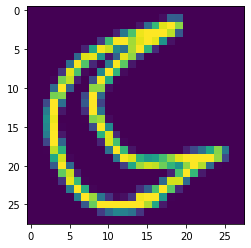

Raw image:
There are 1 number of strokes in this raw image file!


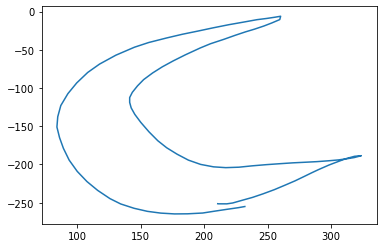

In [15]:
print('There are ', len(npy_data)+1, ' images in selected category', categories[category])
print("Select an index value from 0 to", len(npy_data), "to display and compare bitmap and raw images:")
#index=input()
index='0'
plot_bitmap()
plt.show()
plot_raw()

In [16]:
# TRAIN TEST SPLIT
filepath = paths_dict['input_path']
x_train, x_test, y_train, y_test = split_data(filepath, categories[category], shuffle=False)

In [17]:
T = int(config['DRAW']['T'])
batch_size = int(config['DRAW']['batch_size'])
A = int(config['DRAW']['A'])
B = int(config['DRAW']['B'])
z_size = int(config['DRAW']['z_size'])
N = int(config['DRAW']['N'])
dec_size = int(config['DRAW']['dec_size'])
enc_size = int(config['DRAW']['enc_size'])
epoch_num = int(config['DRAW']['epoch_num'])
learning_rate = float(config['DRAW']['learning_rate'])
beta1 = float(config['DRAW']['beta1'])
USE_CUDA = eval(config['DRAW']['USE_CUDA'])
clip = float(config['DRAW']['clip'])
path = os.path.join(root_path, "src", config['DRAW']['path'])
image_output_file=os.path.join(root_path, "src", config['DRAW']['image_output_file'])
base_img_name=os.path.join(root_path, "src", config['DRAW']['base_img_name'])

In [18]:
# TRAINING AND TESTING

train_data = Dataset(x_train)
print('training data length:', int(len(train_data.data)/batch_size))

test_data = Dataset(x_test)
print('test data length:', int(len(test_data.data)/batch_size))

model = DRAW(T, A, B, batch_size, z_size, N, dec_size, enc_size, learning_rate, beta1, clip, path, category)

if USE_CUDA:
    model.cuda()

def train():
    print("training...")
    img_loc = {'startr':150,
               'endr':180,
               'startc':120,
               'endc':150}
    model.start(epoch_num, img_loc, phase='train') 

def test():    
    print("testing...")
    img_loc = {'startr':150,
               'endr':180,
               'startc':120,
               'endc':150}    
    model.start(epoch_num, img_loc, phase='test')

training data length: 1520
test data length: 380


In [19]:
#epoch_num = 1

training...
start, end:0, 64


C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\draw_model.py:216: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(self.parameters(), self.clip)


start, end:64, 128
start, end:128, 192
start, end:192, 256
start, end:256, 320
start, end:320, 384
start, end:384, 448
start, end:448, 512
start, end:512, 576
start, end:576, 640
start, end:640, 704
start, end:704, 768
start, end:768, 832
start, end:832, 896
start, end:896, 960
start, end:960, 1024
start, end:1024, 1088
start, end:1088, 1152
start, end:1152, 1216
start, end:1216, 1280
start, end:1280, 1344
start, end:1344, 1408
start, end:1408, 1472
start, end:1472, 1536
start, end:1536, 1600
start, end:1600, 1664
start, end:1664, 1728
start, end:1728, 1792
start, end:1792, 1856
start, end:1856, 1920
start, end:1920, 1984
start, end:1984, 2048
start, end:2048, 2112
start, end:2112, 2176
start, end:2176, 2240
start, end:2240, 2304
start, end:2304, 2368
start, end:2368, 2432
start, end:2432, 2496
start, end:2496, 2560
start, end:2560, 2624
start, end:2624, 2688
start, end:2688, 2752
start, end:2752, 2816
start, end:2816, 2880
start, end:2880, 2944
start, end:2944, 3008
start, end:3008, 3

start, end:22272, 22336
start, end:22336, 22400
start, end:22400, 22464
start, end:22464, 22528
start, end:22528, 22592
start, end:22592, 22656
start, end:22656, 22720
start, end:22720, 22784
start, end:22784, 22848
start, end:22848, 22912
start, end:22912, 22976
start, end:22976, 23040
start, end:23040, 23104
start, end:23104, 23168
start, end:23168, 23232
start, end:23232, 23296
start, end:23296, 23360
start, end:23360, 23424
start, end:23424, 23488
start, end:23488, 23552
start, end:23552, 23616
start, end:23616, 23680
start, end:23680, 23744
start, end:23744, 23808
start, end:23808, 23872
start, end:23872, 23936
start, end:23936, 24000
start, end:24000, 24064
start, end:24064, 24128
start, end:24128, 24192
start, end:24192, 24256
start, end:24256, 24320
start, end:24320, 24384
start, end:24384, 24448
start, end:24448, 24512
start, end:24512, 24576
start, end:24576, 24640
start, end:24640, 24704
start, end:24704, 24768
start, end:24768, 24832
start, end:24832, 24896
start, end:24896

start, end:43584, 43648
start, end:43648, 43712
start, end:43712, 43776
start, end:43776, 43840
start, end:43840, 43904
start, end:43904, 43968
start, end:43968, 44032
start, end:44032, 44096
start, end:44096, 44160
start, end:44160, 44224
start, end:44224, 44288
start, end:44288, 44352
start, end:44352, 44416
start, end:44416, 44480
start, end:44480, 44544
start, end:44544, 44608
start, end:44608, 44672
start, end:44672, 44736
start, end:44736, 44800
Phase: train | Epoch: 0 | Count: 700 \ Start Time: 00:36:44 | Loss: 267
start, end:44800, 44864
start, end:44864, 44928
start, end:44928, 44992
start, end:44992, 45056
start, end:45056, 45120
start, end:45120, 45184
start, end:45184, 45248
start, end:45248, 45312
start, end:45312, 45376
start, end:45376, 45440
start, end:45440, 45504
start, end:45504, 45568
start, end:45568, 45632
start, end:45632, 45696
start, end:45696, 45760
start, end:45760, 45824
start, end:45824, 45888
start, end:45888, 45952
start, end:45952, 46016
start, end:46016

start, end:64704, 64768
start, end:64768, 64832
start, end:64832, 64896
start, end:64896, 64960
start, end:64960, 65024
start, end:65024, 65088
start, end:65088, 65152
start, end:65152, 65216
start, end:65216, 65280
start, end:65280, 65344
start, end:65344, 65408
start, end:65408, 65472
start, end:65472, 65536
start, end:65536, 65600
start, end:65600, 65664
start, end:65664, 65728
start, end:65728, 65792
start, end:65792, 65856
start, end:65856, 65920
start, end:65920, 65984
start, end:65984, 66048
start, end:66048, 66112
start, end:66112, 66176
start, end:66176, 66240
start, end:66240, 66304
start, end:66304, 66368
start, end:66368, 66432
start, end:66432, 66496
start, end:66496, 66560
start, end:66560, 66624
start, end:66624, 66688
start, end:66688, 66752
start, end:66752, 66816
start, end:66816, 66880
start, end:66880, 66944
start, end:66944, 67008
start, end:67008, 67072
start, end:67072, 67136
start, end:67136, 67200
start, end:67200, 67264
start, end:67264, 67328
start, end:67328

start, end:86016, 86080
start, end:86080, 86144
start, end:86144, 86208
start, end:86208, 86272
start, end:86272, 86336
start, end:86336, 86400
start, end:86400, 86464
start, end:86464, 86528
start, end:86528, 86592
start, end:86592, 86656
start, end:86656, 86720
start, end:86720, 86784
start, end:86784, 86848
start, end:86848, 86912
start, end:86912, 86976
start, end:86976, 87040
start, end:87040, 87104
start, end:87104, 87168
start, end:87168, 87232
start, end:87232, 87296
start, end:87296, 87360
start, end:87360, 87424
start, end:87424, 87488
start, end:87488, 87552
start, end:87552, 87616
start, end:87616, 87680
start, end:87680, 87744
start, end:87744, 87808
start, end:87808, 87872
start, end:87872, 87936
start, end:87936, 88000
start, end:88000, 88064
start, end:88064, 88128
start, end:88128, 88192
start, end:88192, 88256
start, end:88256, 88320
start, end:88320, 88384
start, end:88384, 88448
start, end:88448, 88512
start, end:88512, 88576
start, end:88576, 88640
start, end:88640

start, end:10896, 10960
start, end:10960, 11024
start, end:11024, 11088
start, end:11088, 11152
start, end:11152, 11216
start, end:11216, 11280
start, end:11280, 11344
start, end:11344, 11408
start, end:11408, 11472
Phase: train | Epoch: 1 | Count: 1700 \ Start Time: 00:43:31 | Loss: 239
start, end:11472, 11536
start, end:11536, 11600
start, end:11600, 11664
start, end:11664, 11728
start, end:11728, 11792
start, end:11792, 11856
start, end:11856, 11920
start, end:11920, 11984
start, end:11984, 12048
start, end:12048, 12112
start, end:12112, 12176
start, end:12176, 12240
start, end:12240, 12304
start, end:12304, 12368
start, end:12368, 12432
start, end:12432, 12496
start, end:12496, 12560
start, end:12560, 12624
start, end:12624, 12688
start, end:12688, 12752
start, end:12752, 12816
start, end:12816, 12880
start, end:12880, 12944
start, end:12944, 13008
start, end:13008, 13072
start, end:13072, 13136
start, end:13136, 13200
start, end:13200, 13264
start, end:13264, 13328
start, end:1332

start, end:32016, 32080
start, end:32080, 32144
start, end:32144, 32208
start, end:32208, 32272
start, end:32272, 32336
start, end:32336, 32400
start, end:32400, 32464
start, end:32464, 32528
start, end:32528, 32592
start, end:32592, 32656
start, end:32656, 32720
start, end:32720, 32784
start, end:32784, 32848
start, end:32848, 32912
start, end:32912, 32976
start, end:32976, 33040
start, end:33040, 33104
start, end:33104, 33168
start, end:33168, 33232
start, end:33232, 33296
start, end:33296, 33360
start, end:33360, 33424
start, end:33424, 33488
start, end:33488, 33552
start, end:33552, 33616
start, end:33616, 33680
start, end:33680, 33744
start, end:33744, 33808
start, end:33808, 33872
start, end:33872, 33936
start, end:33936, 34000
start, end:34000, 34064
start, end:34064, 34128
start, end:34128, 34192
start, end:34192, 34256
start, end:34256, 34320
start, end:34320, 34384
start, end:34384, 34448
start, end:34448, 34512
start, end:34512, 34576
start, end:34576, 34640
start, end:34640

start, end:53328, 53392
start, end:53392, 53456
start, end:53456, 53520
start, end:53520, 53584
start, end:53584, 53648
start, end:53648, 53712
start, end:53712, 53776
start, end:53776, 53840
start, end:53840, 53904
start, end:53904, 53968
start, end:53968, 54032
start, end:54032, 54096
start, end:54096, 54160
start, end:54160, 54224
start, end:54224, 54288
start, end:54288, 54352
start, end:54352, 54416
start, end:54416, 54480
start, end:54480, 54544
start, end:54544, 54608
start, end:54608, 54672
start, end:54672, 54736
start, end:54736, 54800
start, end:54800, 54864
start, end:54864, 54928
start, end:54928, 54992
start, end:54992, 55056
start, end:55056, 55120
start, end:55120, 55184
start, end:55184, 55248
start, end:55248, 55312
start, end:55312, 55376
start, end:55376, 55440
start, end:55440, 55504
start, end:55504, 55568
start, end:55568, 55632
start, end:55632, 55696
start, end:55696, 55760
start, end:55760, 55824
start, end:55824, 55888
start, end:55888, 55952
start, end:55952

start, end:74640, 74704
start, end:74704, 74768
start, end:74768, 74832
start, end:74832, 74896
start, end:74896, 74960
start, end:74960, 75024
start, end:75024, 75088
start, end:75088, 75152
start, end:75152, 75216
start, end:75216, 75280
start, end:75280, 75344
start, end:75344, 75408
start, end:75408, 75472
Phase: train | Epoch: 1 | Count: 2700 \ Start Time: 00:51:22 | Loss: 221
start, end:75472, 75536
start, end:75536, 75600
start, end:75600, 75664
start, end:75664, 75728
start, end:75728, 75792
start, end:75792, 75856
start, end:75856, 75920
start, end:75920, 75984
start, end:75984, 76048
start, end:76048, 76112
start, end:76112, 76176
start, end:76176, 76240
start, end:76240, 76304
start, end:76304, 76368
start, end:76368, 76432
start, end:76432, 76496
start, end:76496, 76560
start, end:76560, 76624
start, end:76624, 76688
start, end:76688, 76752
start, end:76752, 76816
start, end:76816, 76880
start, end:76880, 76944
start, end:76944, 77008
start, end:77008, 77072
start, end:7707

C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\moon\moon_3000_test_5.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\moon\moon_3000_test_6.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\moon\moon_3000_test_7.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\moon\moon_3000_test_8.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\moon\moon_3000_test_9.png
start, end:94672, 94736
start, end:94736, 94800
start, end:94800, 94864
start, end:94864, 94928
start, end:94928, 94992
start, end:94992, 95056
start, end:95056, 95120
start, end:95120, 95184
start, end:95184, 95248
start, end:95248, 95312
start, end:95312, 95376
start, end:95376, 95440
start, end:95440, 95504
start, end:95504, 95568
start, end:95568, 95632
start, end:95632, 95696
start, end:95696, 95760
start, end:95760, 95824
start, end:95824, 95888
start, end:95888, 95952
start, end:95952, 96016
start, end:96016, 960

start, end:18336, 18400
start, end:18400, 18464
start, end:18464, 18528
start, end:18528, 18592
start, end:18592, 18656
start, end:18656, 18720
start, end:18720, 18784
start, end:18784, 18848
start, end:18848, 18912
start, end:18912, 18976
start, end:18976, 19040
start, end:19040, 19104
start, end:19104, 19168
start, end:19168, 19232
start, end:19232, 19296
start, end:19296, 19360
start, end:19360, 19424
start, end:19424, 19488
start, end:19488, 19552
start, end:19552, 19616
start, end:19616, 19680
start, end:19680, 19744
start, end:19744, 19808
start, end:19808, 19872
start, end:19872, 19936
start, end:19936, 20000
start, end:20000, 20064
start, end:20064, 20128
start, end:20128, 20192
start, end:20192, 20256
start, end:20256, 20320
start, end:20320, 20384
start, end:20384, 20448
start, end:20448, 20512
start, end:20512, 20576
start, end:20576, 20640
start, end:20640, 20704
start, end:20704, 20768
start, end:20768, 20832
start, end:20832, 20896
start, end:20896, 20960
start, end:20960

start, end:39648, 39712
start, end:39712, 39776
start, end:39776, 39840
start, end:39840, 39904
start, end:39904, 39968
start, end:39968, 40032
start, end:40032, 40096
start, end:40096, 40160
start, end:40160, 40224
start, end:40224, 40288
start, end:40288, 40352
start, end:40352, 40416
start, end:40416, 40480
start, end:40480, 40544
start, end:40544, 40608
start, end:40608, 40672
start, end:40672, 40736
start, end:40736, 40800
start, end:40800, 40864
start, end:40864, 40928
start, end:40928, 40992
start, end:40992, 41056
start, end:41056, 41120
start, end:41120, 41184
start, end:41184, 41248
start, end:41248, 41312
start, end:41312, 41376
start, end:41376, 41440
start, end:41440, 41504
start, end:41504, 41568
start, end:41568, 41632
start, end:41632, 41696
start, end:41696, 41760
start, end:41760, 41824
start, end:41824, 41888
start, end:41888, 41952
start, end:41952, 42016
start, end:42016, 42080
start, end:42080, 42144
Phase: train | Epoch: 2 | Count: 3700 \ Start Time: 00:58:16 | L

start, end:60960, 61024
start, end:61024, 61088
start, end:61088, 61152
start, end:61152, 61216
start, end:61216, 61280
start, end:61280, 61344
Phase: train | Epoch: 2 | Count: 4000 \ Start Time: 01:00:16 | Loss: 206
start, end:61344, 61408
start, end:61408, 61472
start, end:61472, 61536
start, end:61536, 61600
start, end:61600, 61664
start, end:61664, 61728
start, end:61728, 61792
start, end:61792, 61856
start, end:61856, 61920
start, end:61920, 61984
start, end:61984, 62048
start, end:62048, 62112
start, end:62112, 62176
start, end:62176, 62240
start, end:62240, 62304
start, end:62304, 62368
start, end:62368, 62432
start, end:62432, 62496
start, end:62496, 62560
start, end:62560, 62624
start, end:62624, 62688
start, end:62688, 62752
start, end:62752, 62816
start, end:62816, 62880
start, end:62880, 62944
start, end:62944, 63008
start, end:63008, 63072
start, end:63072, 63136
start, end:63136, 63200
start, end:63200, 63264
start, end:63264, 63328
start, end:63328, 63392
start, end:6339

start, end:82080, 82144
start, end:82144, 82208
start, end:82208, 82272
start, end:82272, 82336
start, end:82336, 82400
start, end:82400, 82464
start, end:82464, 82528
start, end:82528, 82592
start, end:82592, 82656
start, end:82656, 82720
start, end:82720, 82784
start, end:82784, 82848
start, end:82848, 82912
start, end:82912, 82976
start, end:82976, 83040
start, end:83040, 83104
start, end:83104, 83168
start, end:83168, 83232
start, end:83232, 83296
start, end:83296, 83360
start, end:83360, 83424
start, end:83424, 83488
start, end:83488, 83552
start, end:83552, 83616
start, end:83616, 83680
start, end:83680, 83744
start, end:83744, 83808
start, end:83808, 83872
start, end:83872, 83936
start, end:83936, 84000
start, end:84000, 84064
start, end:84064, 84128
start, end:84128, 84192
start, end:84192, 84256
start, end:84256, 84320
start, end:84320, 84384
start, end:84384, 84448
start, end:84448, 84512
start, end:84512, 84576
start, end:84576, 84640
start, end:84640, 84704
start, end:84704

start, end:6704, 6768
start, end:6768, 6832
start, end:6832, 6896
start, end:6896, 6960
start, end:6960, 7024
start, end:7024, 7088
start, end:7088, 7152
start, end:7152, 7216
start, end:7216, 7280
start, end:7280, 7344
start, end:7344, 7408
start, end:7408, 7472
start, end:7472, 7536
start, end:7536, 7600
start, end:7600, 7664
start, end:7664, 7728
start, end:7728, 7792
start, end:7792, 7856
start, end:7856, 7920
start, end:7920, 7984
start, end:7984, 8048
start, end:8048, 8112
start, end:8112, 8176
start, end:8176, 8240
start, end:8240, 8304
start, end:8304, 8368
start, end:8368, 8432
start, end:8432, 8496
start, end:8496, 8560
start, end:8560, 8624
start, end:8624, 8688
start, end:8688, 8752
start, end:8752, 8816
Phase: train | Epoch: 3 | Count: 4700 \ Start Time: 01:04:55 | Loss: 201
start, end:8816, 8880
start, end:8880, 8944
start, end:8944, 9008
start, end:9008, 9072
start, end:9072, 9136
start, end:9136, 9200
start, end:9200, 9264
start, end:9264, 9328
start, end:9328, 9392
sta

start, end:28080, 28144
start, end:28144, 28208
start, end:28208, 28272
start, end:28272, 28336
start, end:28336, 28400
start, end:28400, 28464
start, end:28464, 28528
start, end:28528, 28592
start, end:28592, 28656
start, end:28656, 28720
start, end:28720, 28784
start, end:28784, 28848
start, end:28848, 28912
start, end:28912, 28976
start, end:28976, 29040
start, end:29040, 29104
start, end:29104, 29168
start, end:29168, 29232
start, end:29232, 29296
start, end:29296, 29360
start, end:29360, 29424
start, end:29424, 29488
start, end:29488, 29552
start, end:29552, 29616
start, end:29616, 29680
start, end:29680, 29744
start, end:29744, 29808
start, end:29808, 29872
start, end:29872, 29936
start, end:29936, 30000
start, end:30000, 30064
start, end:30064, 30128
start, end:30128, 30192
start, end:30192, 30256
start, end:30256, 30320
start, end:30320, 30384
start, end:30384, 30448
start, end:30448, 30512
start, end:30512, 30576
start, end:30576, 30640
start, end:30640, 30704
start, end:30704

start, end:49392, 49456
start, end:49456, 49520
start, end:49520, 49584
start, end:49584, 49648
start, end:49648, 49712
start, end:49712, 49776
start, end:49776, 49840
start, end:49840, 49904
start, end:49904, 49968
start, end:49968, 50032
start, end:50032, 50096
start, end:50096, 50160
start, end:50160, 50224
start, end:50224, 50288
start, end:50288, 50352
start, end:50352, 50416
start, end:50416, 50480
start, end:50480, 50544
start, end:50544, 50608
start, end:50608, 50672
start, end:50672, 50736
start, end:50736, 50800
start, end:50800, 50864
start, end:50864, 50928
start, end:50928, 50992
start, end:50992, 51056
start, end:51056, 51120
start, end:51120, 51184
start, end:51184, 51248
start, end:51248, 51312
start, end:51312, 51376
start, end:51376, 51440
start, end:51440, 51504
start, end:51504, 51568
start, end:51568, 51632
start, end:51632, 51696
start, end:51696, 51760
start, end:51760, 51824
start, end:51824, 51888
start, end:51888, 51952
start, end:51952, 52016
start, end:52016

start, end:70704, 70768
start, end:70768, 70832
start, end:70832, 70896
start, end:70896, 70960
start, end:70960, 71024
start, end:71024, 71088
start, end:71088, 71152
start, end:71152, 71216
start, end:71216, 71280
start, end:71280, 71344
start, end:71344, 71408
start, end:71408, 71472
start, end:71472, 71536
start, end:71536, 71600
start, end:71600, 71664
start, end:71664, 71728
start, end:71728, 71792
start, end:71792, 71856
start, end:71856, 71920
start, end:71920, 71984
start, end:71984, 72048
start, end:72048, 72112
start, end:72112, 72176
start, end:72176, 72240
start, end:72240, 72304
start, end:72304, 72368
start, end:72368, 72432
start, end:72432, 72496
start, end:72496, 72560
start, end:72560, 72624
start, end:72624, 72688
start, end:72688, 72752
start, end:72752, 72816
Phase: train | Epoch: 3 | Count: 5700 \ Start Time: 01:11:38 | Loss: 192
start, end:72816, 72880
start, end:72880, 72944
start, end:72944, 73008
start, end:73008, 73072
start, end:73072, 73136
start, end:7313

Phase: train | Epoch: 3 | Count: 6000 \ Start Time: 01:13:37 | Loss: 193
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\moon\moon_6000_test_0.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\moon\moon_6000_test_1.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\moon\moon_6000_test_2.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\moon\moon_6000_test_3.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\moon\moon_6000_test_4.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\moon\moon_6000_test_5.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\moon\moon_6000_test_6.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\moon\moon_6000_test_7.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\moon\moon_6000_test_8.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\moo

start, end:14208, 14272
start, end:14272, 14336
start, end:14336, 14400
start, end:14400, 14464
start, end:14464, 14528
start, end:14528, 14592
start, end:14592, 14656
start, end:14656, 14720
start, end:14720, 14784
start, end:14784, 14848
start, end:14848, 14912
start, end:14912, 14976
start, end:14976, 15040
start, end:15040, 15104
start, end:15104, 15168
start, end:15168, 15232
start, end:15232, 15296
start, end:15296, 15360
start, end:15360, 15424
start, end:15424, 15488
start, end:15488, 15552
start, end:15552, 15616
start, end:15616, 15680
start, end:15680, 15744
start, end:15744, 15808
start, end:15808, 15872
start, end:15872, 15936
start, end:15936, 16000
start, end:16000, 16064
start, end:16064, 16128
start, end:16128, 16192
start, end:16192, 16256
start, end:16256, 16320
start, end:16320, 16384
start, end:16384, 16448
start, end:16448, 16512
start, end:16512, 16576
start, end:16576, 16640
start, end:16640, 16704
start, end:16704, 16768
start, end:16768, 16832
start, end:16832

start, end:35520, 35584
start, end:35584, 35648
start, end:35648, 35712
start, end:35712, 35776
start, end:35776, 35840
start, end:35840, 35904
start, end:35904, 35968
start, end:35968, 36032
start, end:36032, 36096
start, end:36096, 36160
start, end:36160, 36224
start, end:36224, 36288
start, end:36288, 36352
start, end:36352, 36416
start, end:36416, 36480
start, end:36480, 36544
start, end:36544, 36608
start, end:36608, 36672
start, end:36672, 36736
start, end:36736, 36800
start, end:36800, 36864
start, end:36864, 36928
start, end:36928, 36992
start, end:36992, 37056
start, end:37056, 37120
start, end:37120, 37184
start, end:37184, 37248
start, end:37248, 37312
start, end:37312, 37376
start, end:37376, 37440
start, end:37440, 37504
start, end:37504, 37568
start, end:37568, 37632
start, end:37632, 37696
start, end:37696, 37760
start, end:37760, 37824
start, end:37824, 37888
start, end:37888, 37952
start, end:37952, 38016
start, end:38016, 38080
start, end:38080, 38144
start, end:38144

start, end:56832, 56896
start, end:56896, 56960
start, end:56960, 57024
start, end:57024, 57088
start, end:57088, 57152
start, end:57152, 57216
start, end:57216, 57280
start, end:57280, 57344
start, end:57344, 57408
start, end:57408, 57472
start, end:57472, 57536
start, end:57536, 57600
start, end:57600, 57664
start, end:57664, 57728
start, end:57728, 57792
start, end:57792, 57856
start, end:57856, 57920
start, end:57920, 57984
start, end:57984, 58048
start, end:58048, 58112
start, end:58112, 58176
start, end:58176, 58240
start, end:58240, 58304
start, end:58304, 58368
start, end:58368, 58432
start, end:58432, 58496
start, end:58496, 58560
start, end:58560, 58624
start, end:58624, 58688
Phase: train | Epoch: 4 | Count: 7000 \ Start Time: 01:20:48 | Loss: 186
start, end:58688, 58752
start, end:58752, 58816
start, end:58816, 58880
start, end:58880, 58944
start, end:58944, 59008
start, end:59008, 59072
start, end:59072, 59136
start, end:59136, 59200
start, end:59200, 59264
start, end:5926

start, end:77952, 78016
start, end:78016, 78080
start, end:78080, 78144
start, end:78144, 78208
start, end:78208, 78272
start, end:78272, 78336
start, end:78336, 78400
start, end:78400, 78464
start, end:78464, 78528
start, end:78528, 78592
start, end:78592, 78656
start, end:78656, 78720
start, end:78720, 78784
start, end:78784, 78848
start, end:78848, 78912
start, end:78912, 78976
start, end:78976, 79040
start, end:79040, 79104
start, end:79104, 79168
start, end:79168, 79232
start, end:79232, 79296
start, end:79296, 79360
start, end:79360, 79424
start, end:79424, 79488
start, end:79488, 79552
start, end:79552, 79616
start, end:79616, 79680
start, end:79680, 79744
start, end:79744, 79808
start, end:79808, 79872
start, end:79872, 79936
start, end:79936, 80000
start, end:80000, 80064
start, end:80064, 80128
start, end:80128, 80192
start, end:80192, 80256
start, end:80256, 80320
start, end:80320, 80384
start, end:80384, 80448
start, end:80448, 80512
start, end:80512, 80576
start, end:80576

start, end:2192, 2256
start, end:2256, 2320
start, end:2320, 2384
start, end:2384, 2448
start, end:2448, 2512
start, end:2512, 2576
start, end:2576, 2640
start, end:2640, 2704
start, end:2704, 2768
start, end:2768, 2832
start, end:2832, 2896
start, end:2896, 2960
start, end:2960, 3024
start, end:3024, 3088
start, end:3088, 3152
start, end:3152, 3216
start, end:3216, 3280
start, end:3280, 3344
start, end:3344, 3408
start, end:3408, 3472
start, end:3472, 3536
start, end:3536, 3600
start, end:3600, 3664
start, end:3664, 3728
start, end:3728, 3792
start, end:3792, 3856
start, end:3856, 3920
start, end:3920, 3984
start, end:3984, 4048
start, end:4048, 4112
start, end:4112, 4176
start, end:4176, 4240
start, end:4240, 4304
start, end:4304, 4368
start, end:4368, 4432
start, end:4432, 4496
start, end:4496, 4560
start, end:4560, 4624
start, end:4624, 4688
start, end:4688, 4752
start, end:4752, 4816
start, end:4816, 4880
start, end:4880, 4944
start, end:4944, 5008
start, end:5008, 5072
start, end

start, end:24144, 24208
start, end:24208, 24272
start, end:24272, 24336
start, end:24336, 24400
start, end:24400, 24464
start, end:24464, 24528
start, end:24528, 24592
start, end:24592, 24656
start, end:24656, 24720
start, end:24720, 24784
start, end:24784, 24848
start, end:24848, 24912
start, end:24912, 24976
start, end:24976, 25040
start, end:25040, 25104
start, end:25104, 25168
start, end:25168, 25232
start, end:25232, 25296
start, end:25296, 25360
Phase: train | Epoch: 5 | Count: 8000 \ Start Time: 01:28:33 | Loss: 184
start, end:25360, 25424
start, end:25424, 25488
start, end:25488, 25552
start, end:25552, 25616
start, end:25616, 25680
start, end:25680, 25744
start, end:25744, 25808
start, end:25808, 25872
start, end:25872, 25936
start, end:25936, 26000
start, end:26000, 26064
start, end:26064, 26128
start, end:26128, 26192
start, end:26192, 26256
start, end:26256, 26320
start, end:26320, 26384
start, end:26384, 26448
start, end:26448, 26512
start, end:26512, 26576
start, end:2657

start, end:45264, 45328
start, end:45328, 45392
start, end:45392, 45456
start, end:45456, 45520
start, end:45520, 45584
start, end:45584, 45648
start, end:45648, 45712
start, end:45712, 45776
start, end:45776, 45840
start, end:45840, 45904
start, end:45904, 45968
start, end:45968, 46032
start, end:46032, 46096
start, end:46096, 46160
start, end:46160, 46224
start, end:46224, 46288
start, end:46288, 46352
start, end:46352, 46416
start, end:46416, 46480
start, end:46480, 46544
start, end:46544, 46608
start, end:46608, 46672
start, end:46672, 46736
start, end:46736, 46800
start, end:46800, 46864
start, end:46864, 46928
start, end:46928, 46992
start, end:46992, 47056
start, end:47056, 47120
start, end:47120, 47184
start, end:47184, 47248
start, end:47248, 47312
start, end:47312, 47376
start, end:47376, 47440
start, end:47440, 47504
start, end:47504, 47568
start, end:47568, 47632
start, end:47632, 47696
start, end:47696, 47760
start, end:47760, 47824
start, end:47824, 47888
start, end:47888

start, end:66576, 66640
start, end:66640, 66704
start, end:66704, 66768
start, end:66768, 66832
start, end:66832, 66896
start, end:66896, 66960
start, end:66960, 67024
start, end:67024, 67088
start, end:67088, 67152
start, end:67152, 67216
start, end:67216, 67280
start, end:67280, 67344
start, end:67344, 67408
start, end:67408, 67472
start, end:67472, 67536
start, end:67536, 67600
start, end:67600, 67664
start, end:67664, 67728
start, end:67728, 67792
start, end:67792, 67856
start, end:67856, 67920
start, end:67920, 67984
start, end:67984, 68048
start, end:68048, 68112
start, end:68112, 68176
start, end:68176, 68240
start, end:68240, 68304
start, end:68304, 68368
start, end:68368, 68432
start, end:68432, 68496
start, end:68496, 68560
start, end:68560, 68624
start, end:68624, 68688
start, end:68688, 68752
start, end:68752, 68816
start, end:68816, 68880
start, end:68880, 68944
start, end:68944, 69008
start, end:69008, 69072
start, end:69072, 69136
start, end:69136, 69200
start, end:69200

start, end:87888, 87952
start, end:87952, 88016
start, end:88016, 88080
start, end:88080, 88144
start, end:88144, 88208
start, end:88208, 88272
start, end:88272, 88336
start, end:88336, 88400
start, end:88400, 88464
start, end:88464, 88528
start, end:88528, 88592
start, end:88592, 88656
start, end:88656, 88720
start, end:88720, 88784
start, end:88784, 88848
start, end:88848, 88912
start, end:88912, 88976
start, end:88976, 89040
start, end:89040, 89104
start, end:89104, 89168
start, end:89168, 89232
start, end:89232, 89296
start, end:89296, 89360
Phase: train | Epoch: 5 | Count: 9000 \ Start Time: 01:35:52 | Loss: 180


C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\utils\model_utils.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.matshow(img, cmap=plt.cm.gray)


C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\moon\moon_9000_test_0.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\moon\moon_9000_test_1.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\moon\moon_9000_test_2.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\moon\moon_9000_test_3.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\moon\moon_9000_test_4.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\moon\moon_9000_test_5.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\moon\moon_9000_test_6.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\moon\moon_9000_test_7.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\moon\moon_9000_test_8.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\moon\moon_9000_test_9.png
start, end:89360, 89424
start, end:89424, 89488
st

start, end:11744, 11808
start, end:11808, 11872
start, end:11872, 11936
start, end:11936, 12000
start, end:12000, 12064
start, end:12064, 12128
start, end:12128, 12192
start, end:12192, 12256
start, end:12256, 12320
start, end:12320, 12384
start, end:12384, 12448
start, end:12448, 12512
start, end:12512, 12576
start, end:12576, 12640
start, end:12640, 12704
start, end:12704, 12768
start, end:12768, 12832
start, end:12832, 12896
start, end:12896, 12960
start, end:12960, 13024
start, end:13024, 13088
start, end:13088, 13152
start, end:13152, 13216
start, end:13216, 13280
start, end:13280, 13344
start, end:13344, 13408
start, end:13408, 13472
start, end:13472, 13536
start, end:13536, 13600
start, end:13600, 13664
start, end:13664, 13728
start, end:13728, 13792
start, end:13792, 13856
start, end:13856, 13920
start, end:13920, 13984
start, end:13984, 14048
start, end:14048, 14112
start, end:14112, 14176
start, end:14176, 14240
start, end:14240, 14304
start, end:14304, 14368
start, end:14368

start, end:33056, 33120
start, end:33120, 33184
start, end:33184, 33248
start, end:33248, 33312
start, end:33312, 33376
start, end:33376, 33440
start, end:33440, 33504
start, end:33504, 33568
start, end:33568, 33632
start, end:33632, 33696
start, end:33696, 33760
start, end:33760, 33824
start, end:33824, 33888
start, end:33888, 33952
start, end:33952, 34016
start, end:34016, 34080
start, end:34080, 34144
start, end:34144, 34208
start, end:34208, 34272
start, end:34272, 34336
start, end:34336, 34400
start, end:34400, 34464
start, end:34464, 34528
start, end:34528, 34592
start, end:34592, 34656
start, end:34656, 34720
start, end:34720, 34784
start, end:34784, 34848
start, end:34848, 34912
start, end:34912, 34976
start, end:34976, 35040
start, end:35040, 35104
start, end:35104, 35168
start, end:35168, 35232
start, end:35232, 35296
start, end:35296, 35360
start, end:35360, 35424
start, end:35424, 35488
start, end:35488, 35552
start, end:35552, 35616
start, end:35616, 35680
start, end:35680

start, end:54368, 54432
start, end:54432, 54496
start, end:54496, 54560
start, end:54560, 54624
start, end:54624, 54688
start, end:54688, 54752
start, end:54752, 54816
start, end:54816, 54880
start, end:54880, 54944
start, end:54944, 55008
start, end:55008, 55072
start, end:55072, 55136
start, end:55136, 55200
start, end:55200, 55264
start, end:55264, 55328
start, end:55328, 55392
start, end:55392, 55456
start, end:55456, 55520
start, end:55520, 55584
start, end:55584, 55648
start, end:55648, 55712
start, end:55712, 55776
start, end:55776, 55840
start, end:55840, 55904
start, end:55904, 55968
start, end:55968, 56032
Phase: train | Epoch: 6 | Count: 10000 \ Start Time: 01:42:41 | Loss: 176
start, end:56032, 56096
start, end:56096, 56160
start, end:56160, 56224
start, end:56224, 56288
start, end:56288, 56352
start, end:56352, 56416
start, end:56416, 56480
start, end:56480, 56544
start, end:56544, 56608
start, end:56608, 56672
start, end:56672, 56736
start, end:56736, 56800
start, end:568

start, end:75488, 75552
start, end:75552, 75616
start, end:75616, 75680
start, end:75680, 75744
start, end:75744, 75808
start, end:75808, 75872
start, end:75872, 75936
start, end:75936, 76000
start, end:76000, 76064
start, end:76064, 76128
start, end:76128, 76192
start, end:76192, 76256
start, end:76256, 76320
start, end:76320, 76384
start, end:76384, 76448
start, end:76448, 76512
start, end:76512, 76576
start, end:76576, 76640
start, end:76640, 76704
start, end:76704, 76768
start, end:76768, 76832
start, end:76832, 76896
start, end:76896, 76960
start, end:76960, 77024
start, end:77024, 77088
start, end:77088, 77152
start, end:77152, 77216
start, end:77216, 77280
start, end:77280, 77344
start, end:77344, 77408
start, end:77408, 77472
start, end:77472, 77536
start, end:77536, 77600
start, end:77600, 77664
start, end:77664, 77728
start, end:77728, 77792
start, end:77792, 77856
start, end:77856, 77920
start, end:77920, 77984
start, end:77984, 78048
start, end:78048, 78112
start, end:78112

start, end:96800, 96864
start, end:96864, 96928
start, end:96928, 96992
start, end:96992, 97056
start, end:97056, 97120
start, end:97120, 97184
start, end:97184, 97248
start, end:97248, 97312
start, end:0, 48
start, end:48, 112
start, end:112, 176
start, end:176, 240
start, end:240, 304
start, end:304, 368
start, end:368, 432
start, end:432, 496
start, end:496, 560
start, end:560, 624
start, end:624, 688
start, end:688, 752
start, end:752, 816
start, end:816, 880
start, end:880, 944
start, end:944, 1008
start, end:1008, 1072
start, end:1072, 1136
start, end:1136, 1200
start, end:1200, 1264
start, end:1264, 1328
start, end:1328, 1392
start, end:1392, 1456
start, end:1456, 1520
start, end:1520, 1584
start, end:1584, 1648
start, end:1648, 1712
start, end:1712, 1776
start, end:1776, 1840
start, end:1840, 1904
start, end:1904, 1968
start, end:1968, 2032
start, end:2032, 2096
start, end:2096, 2160
start, end:2160, 2224
start, end:2224, 2288
start, end:2288, 2352
start, end:2352, 2416
start, 

start, end:21680, 21744
start, end:21744, 21808
start, end:21808, 21872
start, end:21872, 21936
start, end:21936, 22000
start, end:22000, 22064
start, end:22064, 22128
start, end:22128, 22192
start, end:22192, 22256
start, end:22256, 22320
start, end:22320, 22384
start, end:22384, 22448
start, end:22448, 22512
start, end:22512, 22576
start, end:22576, 22640
start, end:22640, 22704
Phase: train | Epoch: 7 | Count: 11000 \ Start Time: 01:49:27 | Loss: 177
start, end:22704, 22768
start, end:22768, 22832
start, end:22832, 22896
start, end:22896, 22960
start, end:22960, 23024
start, end:23024, 23088
start, end:23088, 23152
start, end:23152, 23216
start, end:23216, 23280
start, end:23280, 23344
start, end:23344, 23408
start, end:23408, 23472
start, end:23472, 23536
start, end:23536, 23600
start, end:23600, 23664
start, end:23664, 23728
start, end:23728, 23792
start, end:23792, 23856
start, end:23856, 23920
start, end:23920, 23984
start, end:23984, 24048
start, end:24048, 24112
start, end:241

start, end:42800, 42864
start, end:42864, 42928
start, end:42928, 42992
start, end:42992, 43056
start, end:43056, 43120
start, end:43120, 43184
start, end:43184, 43248
start, end:43248, 43312
start, end:43312, 43376
start, end:43376, 43440
start, end:43440, 43504
start, end:43504, 43568
start, end:43568, 43632
start, end:43632, 43696
start, end:43696, 43760
start, end:43760, 43824
start, end:43824, 43888
start, end:43888, 43952
start, end:43952, 44016
start, end:44016, 44080
start, end:44080, 44144
start, end:44144, 44208
start, end:44208, 44272
start, end:44272, 44336
start, end:44336, 44400
start, end:44400, 44464
start, end:44464, 44528
start, end:44528, 44592
start, end:44592, 44656
start, end:44656, 44720
start, end:44720, 44784
start, end:44784, 44848
start, end:44848, 44912
start, end:44912, 44976
start, end:44976, 45040
start, end:45040, 45104
start, end:45104, 45168
start, end:45168, 45232
start, end:45232, 45296
start, end:45296, 45360
start, end:45360, 45424
start, end:45424

start, end:64112, 64176
start, end:64176, 64240
start, end:64240, 64304
start, end:64304, 64368
start, end:64368, 64432
start, end:64432, 64496
start, end:64496, 64560
start, end:64560, 64624
start, end:64624, 64688
start, end:64688, 64752
start, end:64752, 64816
start, end:64816, 64880
start, end:64880, 64944
start, end:64944, 65008
start, end:65008, 65072
start, end:65072, 65136
start, end:65136, 65200
start, end:65200, 65264
start, end:65264, 65328
start, end:65328, 65392
start, end:65392, 65456
start, end:65456, 65520
start, end:65520, 65584
start, end:65584, 65648
start, end:65648, 65712
start, end:65712, 65776
start, end:65776, 65840
start, end:65840, 65904
start, end:65904, 65968
start, end:65968, 66032
start, end:66032, 66096
start, end:66096, 66160
start, end:66160, 66224
start, end:66224, 66288
start, end:66288, 66352
start, end:66352, 66416
start, end:66416, 66480
start, end:66480, 66544
start, end:66544, 66608
start, end:66608, 66672
start, end:66672, 66736
start, end:66736

start, end:85424, 85488
start, end:85488, 85552
start, end:85552, 85616
start, end:85616, 85680
start, end:85680, 85744
start, end:85744, 85808
start, end:85808, 85872
start, end:85872, 85936
start, end:85936, 86000
start, end:86000, 86064
start, end:86064, 86128
start, end:86128, 86192
start, end:86192, 86256
start, end:86256, 86320
start, end:86320, 86384
start, end:86384, 86448
start, end:86448, 86512
start, end:86512, 86576
start, end:86576, 86640
start, end:86640, 86704
Phase: train | Epoch: 7 | Count: 12000 \ Start Time: 01:56:18 | Loss: 175
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\moon\moon_12000_test_0.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\moon\moon_12000_test_1.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\moon\moon_12000_test_2.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\moon\moon_12000_test_3.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\

start, end:7552, 7616
start, end:7616, 7680
start, end:7680, 7744
start, end:7744, 7808
start, end:7808, 7872
start, end:7872, 7936
start, end:7936, 8000
start, end:8000, 8064
start, end:8064, 8128
start, end:8128, 8192
start, end:8192, 8256
start, end:8256, 8320
start, end:8320, 8384
start, end:8384, 8448
start, end:8448, 8512
start, end:8512, 8576
Phase: train | Epoch: 8 | Count: 12300 \ Start Time: 01:58:23 | Loss: 174
start, end:8576, 8640
start, end:8640, 8704
start, end:8704, 8768
start, end:8768, 8832
start, end:8832, 8896
start, end:8896, 8960
start, end:8960, 9024
start, end:9024, 9088
start, end:9088, 9152
start, end:9152, 9216
start, end:9216, 9280
start, end:9280, 9344
start, end:9344, 9408
start, end:9408, 9472
start, end:9472, 9536
start, end:9536, 9600
start, end:9600, 9664
start, end:9664, 9728
start, end:9728, 9792
start, end:9792, 9856
start, end:9856, 9920
start, end:9920, 9984
start, end:9984, 10048
start, end:10048, 10112
start, end:10112, 10176
start, end:10176, 1

start, end:28864, 28928
start, end:28928, 28992
start, end:28992, 29056
start, end:29056, 29120
start, end:29120, 29184
start, end:29184, 29248
start, end:29248, 29312
start, end:29312, 29376
start, end:29376, 29440
start, end:29440, 29504
start, end:29504, 29568
start, end:29568, 29632
start, end:29632, 29696
start, end:29696, 29760
start, end:29760, 29824
start, end:29824, 29888
start, end:29888, 29952
start, end:29952, 30016
start, end:30016, 30080
start, end:30080, 30144
start, end:30144, 30208
start, end:30208, 30272
start, end:30272, 30336
start, end:30336, 30400
start, end:30400, 30464
start, end:30464, 30528
start, end:30528, 30592
start, end:30592, 30656
start, end:30656, 30720
start, end:30720, 30784
start, end:30784, 30848
start, end:30848, 30912
start, end:30912, 30976
start, end:30976, 31040
start, end:31040, 31104
start, end:31104, 31168
start, end:31168, 31232
start, end:31232, 31296
start, end:31296, 31360
start, end:31360, 31424
start, end:31424, 31488
start, end:31488

start, end:50176, 50240
start, end:50240, 50304
start, end:50304, 50368
start, end:50368, 50432
start, end:50432, 50496
start, end:50496, 50560
start, end:50560, 50624
start, end:50624, 50688
start, end:50688, 50752
start, end:50752, 50816
start, end:50816, 50880
start, end:50880, 50944
start, end:50944, 51008
start, end:51008, 51072
start, end:51072, 51136
start, end:51136, 51200
start, end:51200, 51264
start, end:51264, 51328
start, end:51328, 51392
start, end:51392, 51456
start, end:51456, 51520
start, end:51520, 51584
start, end:51584, 51648
start, end:51648, 51712
start, end:51712, 51776
start, end:51776, 51840
start, end:51840, 51904
start, end:51904, 51968
start, end:51968, 52032
start, end:52032, 52096
start, end:52096, 52160
start, end:52160, 52224
start, end:52224, 52288
start, end:52288, 52352
start, end:52352, 52416
start, end:52416, 52480
start, end:52480, 52544
start, end:52544, 52608
start, end:52608, 52672
start, end:52672, 52736
start, end:52736, 52800
start, end:52800

start, end:71488, 71552
start, end:71552, 71616
start, end:71616, 71680
start, end:71680, 71744
start, end:71744, 71808
start, end:71808, 71872
start, end:71872, 71936
start, end:71936, 72000
start, end:72000, 72064
start, end:72064, 72128
start, end:72128, 72192
start, end:72192, 72256
start, end:72256, 72320
start, end:72320, 72384
start, end:72384, 72448
start, end:72448, 72512
start, end:72512, 72576
Phase: train | Epoch: 8 | Count: 13300 \ Start Time: 02:05:09 | Loss: 172
start, end:72576, 72640
start, end:72640, 72704
start, end:72704, 72768
start, end:72768, 72832
start, end:72832, 72896
start, end:72896, 72960
start, end:72960, 73024
start, end:73024, 73088
start, end:73088, 73152
start, end:73152, 73216
start, end:73216, 73280
start, end:73280, 73344
start, end:73344, 73408
start, end:73408, 73472
start, end:73472, 73536
start, end:73536, 73600
start, end:73600, 73664
start, end:73664, 73728
start, end:73728, 73792
start, end:73792, 73856
start, end:73856, 73920
start, end:739

start, end:92608, 92672
start, end:92672, 92736
start, end:92736, 92800
start, end:92800, 92864
start, end:92864, 92928
start, end:92928, 92992
start, end:92992, 93056
start, end:93056, 93120
start, end:93120, 93184
start, end:93184, 93248
start, end:93248, 93312
start, end:93312, 93376
start, end:93376, 93440
start, end:93440, 93504
start, end:93504, 93568
start, end:93568, 93632
start, end:93632, 93696
start, end:93696, 93760
start, end:93760, 93824
start, end:93824, 93888
start, end:93888, 93952
start, end:93952, 94016
start, end:94016, 94080
start, end:94080, 94144
start, end:94144, 94208
start, end:94208, 94272
start, end:94272, 94336
start, end:94336, 94400
start, end:94400, 94464
start, end:94464, 94528
start, end:94528, 94592
start, end:94592, 94656
start, end:94656, 94720
start, end:94720, 94784
start, end:94784, 94848
start, end:94848, 94912
start, end:94912, 94976
start, end:94976, 95040
start, end:95040, 95104
start, end:95104, 95168
start, end:95168, 95232
start, end:95232

start, end:17488, 17552
start, end:17552, 17616
start, end:17616, 17680
start, end:17680, 17744
start, end:17744, 17808
start, end:17808, 17872
start, end:17872, 17936
start, end:17936, 18000
start, end:18000, 18064
start, end:18064, 18128
start, end:18128, 18192
start, end:18192, 18256
start, end:18256, 18320
start, end:18320, 18384
start, end:18384, 18448
start, end:18448, 18512
start, end:18512, 18576
start, end:18576, 18640
start, end:18640, 18704
start, end:18704, 18768
start, end:18768, 18832
start, end:18832, 18896
start, end:18896, 18960
start, end:18960, 19024
start, end:19024, 19088
start, end:19088, 19152
start, end:19152, 19216
start, end:19216, 19280
start, end:19280, 19344
start, end:19344, 19408
start, end:19408, 19472
start, end:19472, 19536
start, end:19536, 19600
start, end:19600, 19664
start, end:19664, 19728
start, end:19728, 19792
start, end:19792, 19856
start, end:19856, 19920
start, end:19920, 19984
start, end:19984, 20048
Phase: train | Epoch: 9 | Count: 14000 \

start, end:38800, 38864
start, end:38864, 38928
start, end:38928, 38992
start, end:38992, 39056
start, end:39056, 39120
start, end:39120, 39184
start, end:39184, 39248
Phase: train | Epoch: 9 | Count: 14300 \ Start Time: 02:11:59 | Loss: 170
start, end:39248, 39312
start, end:39312, 39376
start, end:39376, 39440
start, end:39440, 39504
start, end:39504, 39568
start, end:39568, 39632
start, end:39632, 39696
start, end:39696, 39760
start, end:39760, 39824
start, end:39824, 39888
start, end:39888, 39952
start, end:39952, 40016
start, end:40016, 40080
start, end:40080, 40144
start, end:40144, 40208
start, end:40208, 40272
start, end:40272, 40336
start, end:40336, 40400
start, end:40400, 40464
start, end:40464, 40528
start, end:40528, 40592
start, end:40592, 40656
start, end:40656, 40720
start, end:40720, 40784
start, end:40784, 40848
start, end:40848, 40912
start, end:40912, 40976
start, end:40976, 41040
start, end:41040, 41104
start, end:41104, 41168
start, end:41168, 41232
start, end:412

start, end:59920, 59984
start, end:59984, 60048
start, end:60048, 60112
start, end:60112, 60176
start, end:60176, 60240
start, end:60240, 60304
start, end:60304, 60368
start, end:60368, 60432
start, end:60432, 60496
start, end:60496, 60560
start, end:60560, 60624
start, end:60624, 60688
start, end:60688, 60752
start, end:60752, 60816
start, end:60816, 60880
start, end:60880, 60944
start, end:60944, 61008
start, end:61008, 61072
start, end:61072, 61136
start, end:61136, 61200
start, end:61200, 61264
start, end:61264, 61328
start, end:61328, 61392
start, end:61392, 61456
start, end:61456, 61520
start, end:61520, 61584
start, end:61584, 61648
start, end:61648, 61712
start, end:61712, 61776
start, end:61776, 61840
start, end:61840, 61904
start, end:61904, 61968
start, end:61968, 62032
start, end:62032, 62096
start, end:62096, 62160
start, end:62160, 62224
start, end:62224, 62288
start, end:62288, 62352
start, end:62352, 62416
start, end:62416, 62480
start, end:62480, 62544
start, end:62544

start, end:81232, 81296
start, end:81296, 81360
start, end:81360, 81424
start, end:81424, 81488
start, end:81488, 81552
start, end:81552, 81616
start, end:81616, 81680
start, end:81680, 81744
start, end:81744, 81808
start, end:81808, 81872
start, end:81872, 81936
start, end:81936, 82000
start, end:82000, 82064
start, end:82064, 82128
start, end:82128, 82192
start, end:82192, 82256
start, end:82256, 82320
start, end:82320, 82384
start, end:82384, 82448
start, end:82448, 82512
start, end:82512, 82576
start, end:82576, 82640
start, end:82640, 82704
start, end:82704, 82768
start, end:82768, 82832
start, end:82832, 82896
start, end:82896, 82960
start, end:82960, 83024
start, end:83024, 83088
start, end:83088, 83152
start, end:83152, 83216
start, end:83216, 83280
start, end:83280, 83344
start, end:83344, 83408
start, end:83408, 83472
start, end:83472, 83536
start, end:83536, 83600
start, end:83600, 83664
start, end:83664, 83728
start, end:83728, 83792
start, end:83792, 83856
start, end:83856

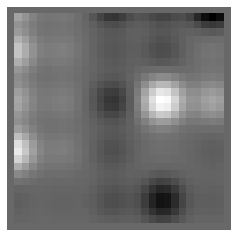

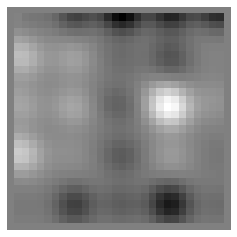

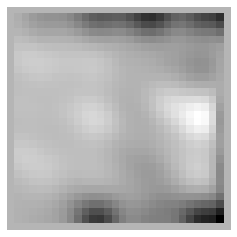

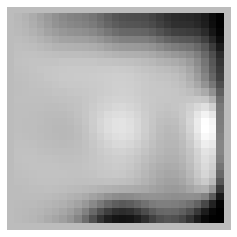

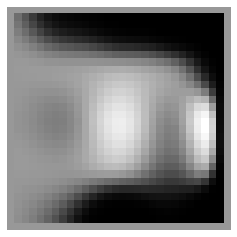

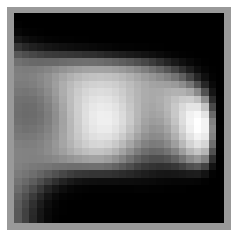

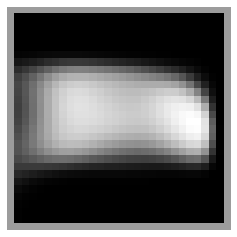

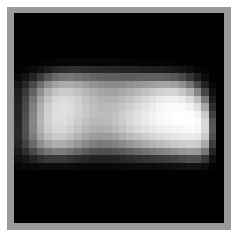

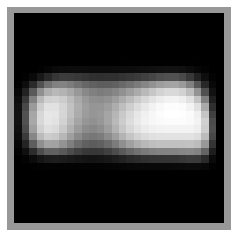

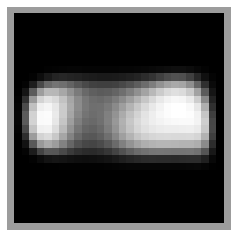

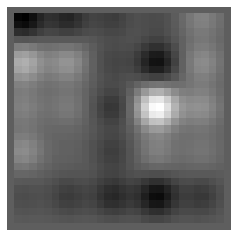

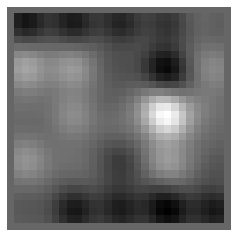

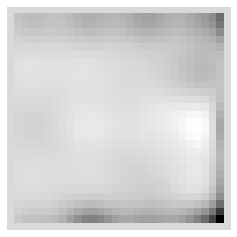

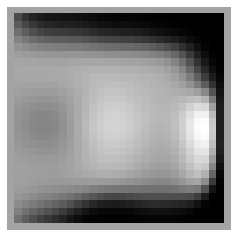

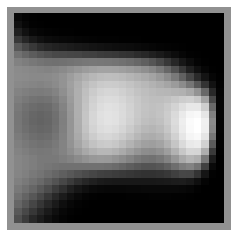

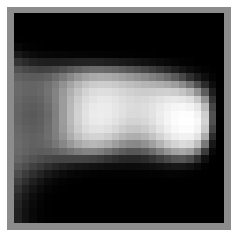

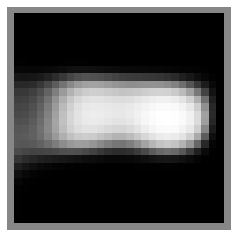

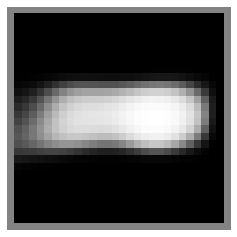

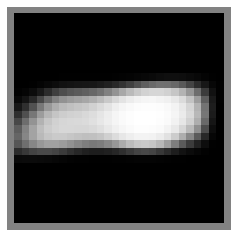

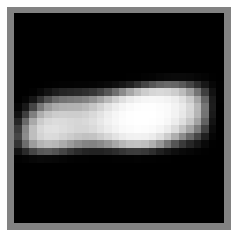

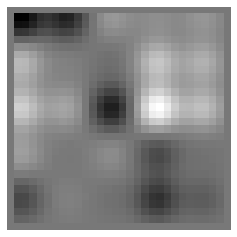

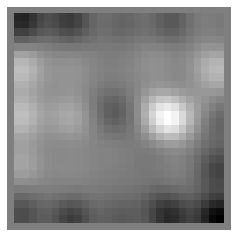

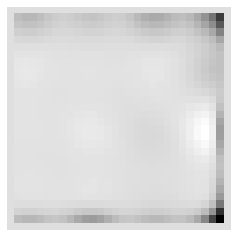

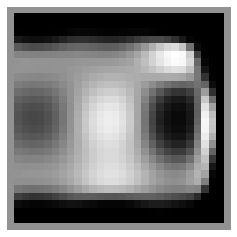

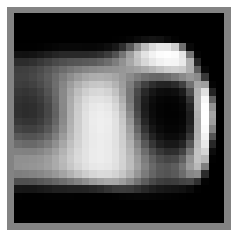

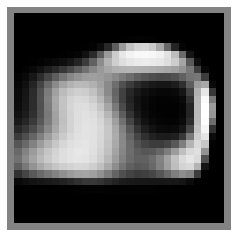

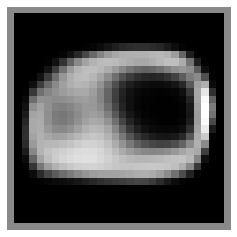

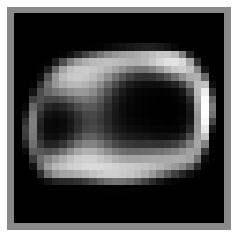

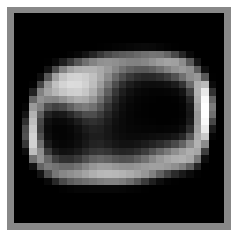

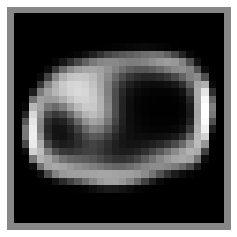

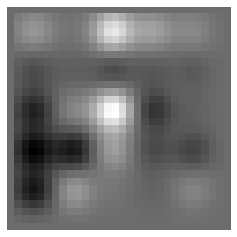

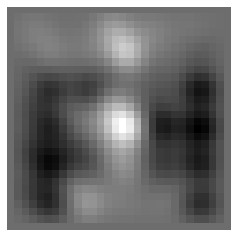

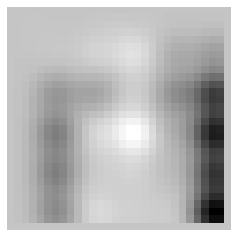

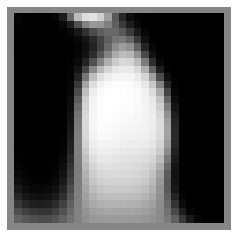

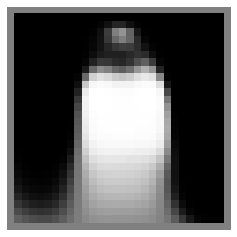

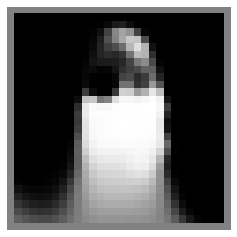

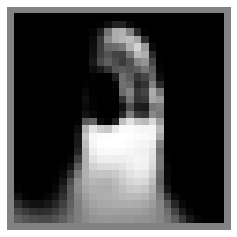

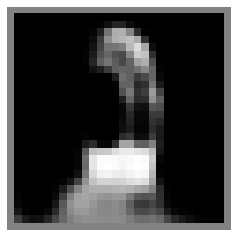

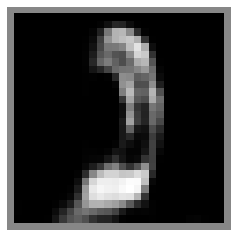

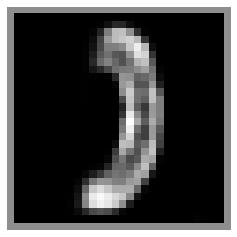

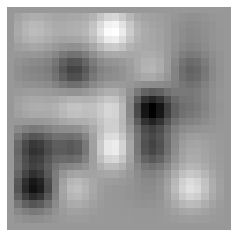

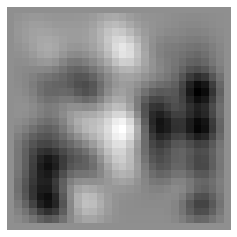

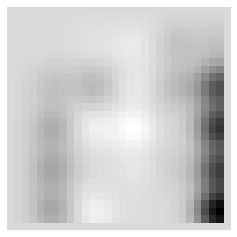

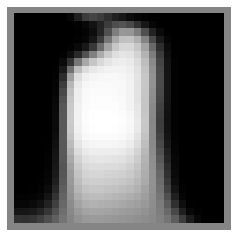

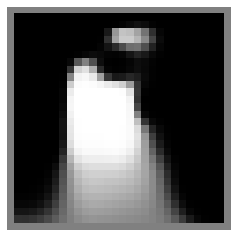

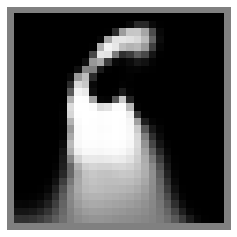

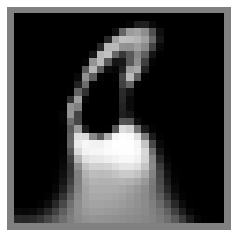

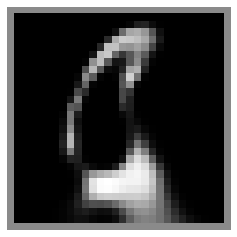

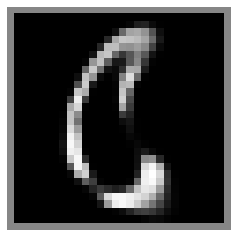

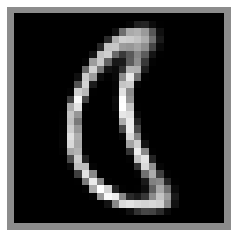

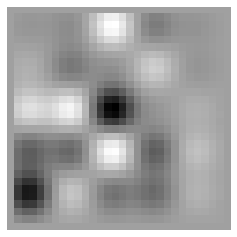

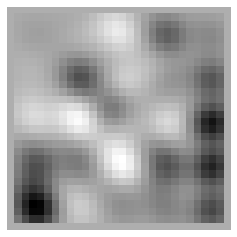

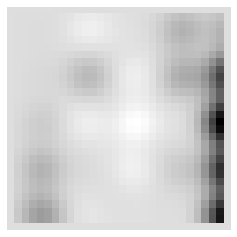

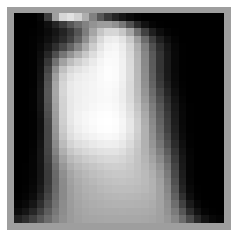

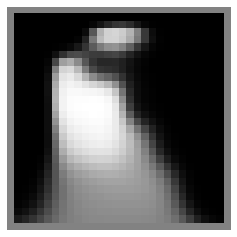

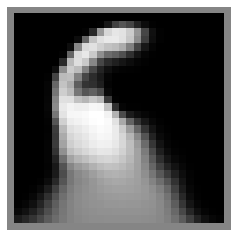

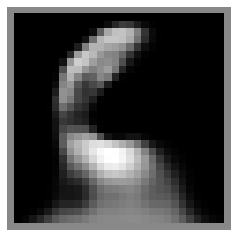

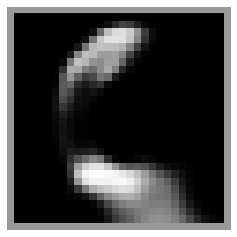

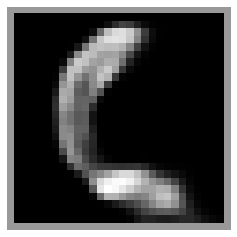

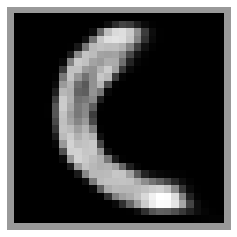

In [20]:
# TRAINING
train()

In [21]:
# SAVING MODEL
model_path = os.path.join(root_path, "src", "save", category, '%s.pth' % category)
torch.save(model.state_dict(), model_path)

In [22]:
def load_model(T, A, B, batch_size, z_size, N, dec_size, enc_size, learning_rate, beta1, clip, path, category):
    torch.set_default_tensor_type('torch.FloatTensor')
    model = DRAW(T, A, B, batch_size, z_size, N, dec_size, enc_size, learning_rate, beta1, clip, path, category)
    root_path = os.getcwd().split('notebook')[0]
    model_path = os.path.join(root_path, "src", "save", category, '%s.pth' % category)
    model.load_state_dict(torch.load(model_path))
    
    return model

def load_weights(T, A, B, batch_size, z_size, N, dec_size, enc_size, learning_rate, beta1, clip, path, category):
    torch.set_default_tensor_type('torch.FloatTensor')
    model = DRAW(T, A, B, batch_size, z_size, N, dec_size, enc_size, learning_rate, beta1, clip, path, category)
    if USE_CUDA:
        model.cuda()
    root_path = os.getcwd().split('notebook')[0]
    weights_file = os.path.join(root_path, "src", "save", category, '%s_weights.tar' % category)
    state_dict = torch.load(weights_file, map_location=torch.device('cpu'))
    model.load_state_dict(state_dict)
    
    return model 

In [23]:
# OPTION 1: LOADS MODEL WEIGHTS
model = load_weights(T, A, B, batch_size, z_size, N, dec_size, enc_size, learning_rate, beta1, clip, path, category)
model.eval()

DRAW(
  (encoder): LSTMCell(306, 256)
  (mu_linear): Linear(in_features=256, out_features=10, bias=True)
  (sigma_linear): Linear(in_features=256, out_features=10, bias=True)
  (decoder): LSTMCell(10, 256)
  (dec_linear): Linear(in_features=256, out_features=5, bias=True)
  (dec_w_linear): Linear(in_features=256, out_features=25, bias=True)
  (sigmoid): Sigmoid()
)

In [24]:
# OPTION2: LOADS MODEL
model = load_model(T, A, B, batch_size, z_size, N, dec_size, enc_size, learning_rate, beta1, clip, path, category)
model.eval()

DRAW(
  (encoder): LSTMCell(306, 256)
  (mu_linear): Linear(in_features=256, out_features=10, bias=True)
  (sigma_linear): Linear(in_features=256, out_features=10, bias=True)
  (decoder): LSTMCell(10, 256)
  (dec_linear): Linear(in_features=256, out_features=5, bias=True)
  (dec_w_linear): Linear(in_features=256, out_features=25, bias=True)
  (sigmoid): Sigmoid()
)

## Testing

In [25]:
# OPTION 1: LOADS MODEL WEIGHTS
model = load_weights(T, A, B, batch_size, z_size, N, dec_size, enc_size, learning_rate, beta1, clip, path, category)
model.eval()

DRAW(
  (encoder): LSTMCell(306, 256)
  (mu_linear): Linear(in_features=256, out_features=10, bias=True)
  (sigma_linear): Linear(in_features=256, out_features=10, bias=True)
  (decoder): LSTMCell(10, 256)
  (dec_linear): Linear(in_features=256, out_features=5, bias=True)
  (dec_w_linear): Linear(in_features=256, out_features=25, bias=True)
  (sigmoid): Sigmoid()
)

In [26]:
# OPTION 2: LOADS MODEL
model = load_model(T, A, B, batch_size, z_size, N, dec_size, enc_size, learning_rate, beta1, clip, path, category)
model.eval()

DRAW(
  (encoder): LSTMCell(306, 256)
  (mu_linear): Linear(in_features=256, out_features=10, bias=True)
  (sigma_linear): Linear(in_features=256, out_features=10, bias=True)
  (decoder): LSTMCell(10, 256)
  (dec_linear): Linear(in_features=256, out_features=5, bias=True)
  (dec_w_linear): Linear(in_features=256, out_features=25, bias=True)
  (sigmoid): Sigmoid()
)

testing...
start, end:0, 64
start, end:64, 128
start, end:128, 192
start, end:192, 256
start, end:256, 320
start, end:320, 384
start, end:384, 448
start, end:448, 512
start, end:512, 576
start, end:576, 640
start, end:640, 704
start, end:704, 768
start, end:768, 832
start, end:832, 896
start, end:896, 960
start, end:960, 1024
start, end:1024, 1088
start, end:1088, 1152
start, end:1152, 1216
start, end:1216, 1280
start, end:1280, 1344
start, end:1344, 1408
start, end:1408, 1472
start, end:1472, 1536
start, end:1536, 1600
Phase: test | Epoch: 0 | Count: 25 \ Start Time: 02:18:44 | Loss: 42
start, end:1600, 1664
start, end:1664, 1728
start, end:1728, 1792
start, end:1792, 1856
start, end:1856, 1920
start, end:1920, 1984
start, end:1984, 2048
start, end:2048, 2112
start, end:2112, 2176
start, end:2176, 2240
start, end:2240, 2304
start, end:2304, 2368
start, end:2368, 2432
start, end:2432, 2496
start, end:2496, 2560
start, end:2560, 2624
start, end:2624, 2688
start, end:2688, 2752
start, en

start, end:20608, 20672
start, end:20672, 20736
start, end:20736, 20800
Phase: test | Epoch: 0 | Count: 325 \ Start Time: 02:19:27 | Loss: 43
start, end:20800, 20864
start, end:20864, 20928
start, end:20928, 20992
start, end:20992, 21056
start, end:21056, 21120
start, end:21120, 21184
start, end:21184, 21248
start, end:21248, 21312
start, end:21312, 21376
start, end:21376, 21440
start, end:21440, 21504
start, end:21504, 21568
start, end:21568, 21632
start, end:21632, 21696
start, end:21696, 21760
start, end:21760, 21824
start, end:21824, 21888
start, end:21888, 21952
start, end:21952, 22016
start, end:22016, 22080
start, end:22080, 22144
start, end:22144, 22208
start, end:22208, 22272
start, end:22272, 22336
start, end:22336, 22400
Phase: test | Epoch: 0 | Count: 350 \ Start Time: 02:19:30 | Loss: 42
start, end:22400, 22464
start, end:22464, 22528
start, end:22528, 22592
start, end:22592, 22656
start, end:22656, 22720
start, end:22720, 22784
start, end:22784, 22848
start, end:22848, 22

start, end:16627, 16691
start, end:16691, 16755
start, end:16755, 16819
start, end:16819, 16883
start, end:16883, 16947
start, end:16947, 17011
start, end:17011, 17075
start, end:17075, 17139
start, end:17139, 17203
start, end:17203, 17267
Phase: test | Epoch: 1 | Count: 650 \ Start Time: 02:20:08 | Loss: 42
start, end:17267, 17331
start, end:17331, 17395
start, end:17395, 17459
start, end:17459, 17523
start, end:17523, 17587
start, end:17587, 17651
start, end:17651, 17715
start, end:17715, 17779
start, end:17779, 17843
start, end:17843, 17907
start, end:17907, 17971
start, end:17971, 18035
start, end:18035, 18099
start, end:18099, 18163
start, end:18163, 18227
start, end:18227, 18291
start, end:18291, 18355
start, end:18355, 18419
start, end:18419, 18483
start, end:18483, 18547
start, end:18547, 18611
start, end:18611, 18675
start, end:18675, 18739
start, end:18739, 18803
start, end:18803, 18867
Phase: test | Epoch: 1 | Count: 675 \ Start Time: 02:20:11 | Loss: 42
start, end:18867, 18

start, end:10598, 10662
start, end:10662, 10726
start, end:10726, 10790
start, end:10790, 10854
start, end:10854, 10918
start, end:10918, 10982
start, end:10982, 11046
start, end:11046, 11110
start, end:11110, 11174
start, end:11174, 11238
start, end:11238, 11302
start, end:11302, 11366
start, end:11366, 11430
start, end:11430, 11494
start, end:11494, 11558
start, end:11558, 11622
start, end:11622, 11686
start, end:11686, 11750
start, end:11750, 11814
start, end:11814, 11878
start, end:11878, 11942
start, end:11942, 12006
start, end:12006, 12070
start, end:12070, 12134
Phase: test | Epoch: 2 | Count: 950 \ Start Time: 02:20:51 | Loss: 42
start, end:12134, 12198
start, end:12198, 12262
start, end:12262, 12326
start, end:12326, 12390
start, end:12390, 12454
start, end:12454, 12518
start, end:12518, 12582
start, end:12582, 12646
start, end:12646, 12710
start, end:12710, 12774
start, end:12774, 12838
start, end:12838, 12902
start, end:12902, 12966
start, end:12966, 13030
start, end:13030, 

start, end:6617, 6681
start, end:6681, 6745
start, end:6745, 6809
start, end:6809, 6873
start, end:6873, 6937
start, end:6937, 7001
Phase: test | Epoch: 3 | Count: 1250 \ Start Time: 02:21:32 | Loss: 42
start, end:7001, 7065
start, end:7065, 7129
start, end:7129, 7193
start, end:7193, 7257
start, end:7257, 7321
start, end:7321, 7385
start, end:7385, 7449
start, end:7449, 7513
start, end:7513, 7577
start, end:7577, 7641
start, end:7641, 7705
start, end:7705, 7769
start, end:7769, 7833
start, end:7833, 7897
start, end:7897, 7961
start, end:7961, 8025
start, end:8025, 8089
start, end:8089, 8153
start, end:8153, 8217
start, end:8217, 8281
start, end:8281, 8345
start, end:8345, 8409
start, end:8409, 8473
start, end:8473, 8537
start, end:8537, 8601
Phase: test | Epoch: 3 | Count: 1275 \ Start Time: 02:21:35 | Loss: 42
start, end:8601, 8665
start, end:8665, 8729
start, end:8729, 8793
start, end:8793, 8857
start, end:8857, 8921
start, end:8921, 8985
start, end:8985, 9049
start, end:9049, 9113


start, end:24217, 24281
start, end:0, 12
start, end:12, 76
start, end:76, 140
start, end:140, 204
start, end:204, 268
Phase: test | Epoch: 4 | Count: 1525 \ Start Time: 02:22:12 | Loss: 43
start, end:268, 332
start, end:332, 396
start, end:396, 460
start, end:460, 524
start, end:524, 588
start, end:588, 652
start, end:652, 716
start, end:716, 780
start, end:780, 844
start, end:844, 908
start, end:908, 972
start, end:972, 1036
start, end:1036, 1100
start, end:1100, 1164
start, end:1164, 1228
start, end:1228, 1292
start, end:1292, 1356
start, end:1356, 1420
start, end:1420, 1484
start, end:1484, 1548
start, end:1548, 1612
start, end:1612, 1676
start, end:1676, 1740
start, end:1740, 1804
start, end:1804, 1868
Phase: test | Epoch: 4 | Count: 1550 \ Start Time: 02:22:15 | Loss: 42
start, end:1868, 1932
start, end:1932, 1996
start, end:1996, 2060
start, end:2060, 2124
start, end:2124, 2188
start, end:2188, 2252
start, end:2252, 2316
start, end:2316, 2380
start, end:2380, 2444
start, end:2444

start, end:20300, 20364
start, end:20364, 20428
start, end:20428, 20492
start, end:20492, 20556
start, end:20556, 20620
start, end:20620, 20684
start, end:20684, 20748
start, end:20748, 20812
start, end:20812, 20876
start, end:20876, 20940
start, end:20940, 21004
start, end:21004, 21068
Phase: test | Epoch: 4 | Count: 1850 \ Start Time: 02:22:56 | Loss: 43
start, end:21068, 21132
start, end:21132, 21196
start, end:21196, 21260
start, end:21260, 21324
start, end:21324, 21388
start, end:21388, 21452
start, end:21452, 21516
start, end:21516, 21580
start, end:21580, 21644
start, end:21644, 21708
start, end:21708, 21772
start, end:21772, 21836
start, end:21836, 21900
start, end:21900, 21964
start, end:21964, 22028
start, end:22028, 22092
start, end:22092, 22156
start, end:22156, 22220
start, end:22220, 22284
start, end:22284, 22348
start, end:22348, 22412
start, end:22412, 22476
start, end:22476, 22540
start, end:22540, 22604
start, end:22604, 22668
Phase: test | Epoch: 4 | Count: 1875 \ St

start, end:16319, 16383
start, end:16383, 16447
start, end:16447, 16511
start, end:16511, 16575
start, end:16575, 16639
start, end:16639, 16703
start, end:16703, 16767
start, end:16767, 16831
start, end:16831, 16895
start, end:16895, 16959
start, end:16959, 17023
start, end:17023, 17087
start, end:17087, 17151
start, end:17151, 17215
start, end:17215, 17279
start, end:17279, 17343
start, end:17343, 17407
start, end:17407, 17471
start, end:17471, 17535
Phase: test | Epoch: 5 | Count: 2175 \ Start Time: 02:23:42 | Loss: 42
start, end:17535, 17599
start, end:17599, 17663
start, end:17663, 17727
start, end:17727, 17791
start, end:17791, 17855
start, end:17855, 17919
start, end:17919, 17983
start, end:17983, 18047
start, end:18047, 18111
start, end:18111, 18175
start, end:18175, 18239
start, end:18239, 18303
start, end:18303, 18367
start, end:18367, 18431
start, end:18431, 18495
start, end:18495, 18559
start, end:18559, 18623
start, end:18623, 18687
start, end:18687, 18751
start, end:18751,

start, end:10226, 10290
start, end:10290, 10354
start, end:10354, 10418
start, end:10418, 10482
start, end:10482, 10546
start, end:10546, 10610
start, end:10610, 10674
start, end:10674, 10738
start, end:10738, 10802
Phase: test | Epoch: 6 | Count: 2450 \ Start Time: 02:24:21 | Loss: 42
start, end:10802, 10866
start, end:10866, 10930
start, end:10930, 10994
start, end:10994, 11058
start, end:11058, 11122
start, end:11122, 11186
start, end:11186, 11250
start, end:11250, 11314
start, end:11314, 11378
start, end:11378, 11442
start, end:11442, 11506
start, end:11506, 11570
start, end:11570, 11634
start, end:11634, 11698
start, end:11698, 11762
start, end:11762, 11826
start, end:11826, 11890
start, end:11890, 11954
start, end:11954, 12018
start, end:12018, 12082
start, end:12082, 12146
start, end:12146, 12210
start, end:12210, 12274
start, end:12274, 12338
start, end:12338, 12402
Phase: test | Epoch: 6 | Count: 2475 \ Start Time: 02:24:25 | Loss: 42
start, end:12402, 12466
start, end:12466, 

start, end:5989, 6053
start, end:6053, 6117
start, end:6117, 6181
start, end:6181, 6245
start, end:6245, 6309
start, end:6309, 6373
start, end:6373, 6437
start, end:6437, 6501
start, end:6501, 6565
start, end:6565, 6629
start, end:6629, 6693
start, end:6693, 6757
start, end:6757, 6821
start, end:6821, 6885
start, end:6885, 6949
start, end:6949, 7013
start, end:7013, 7077
start, end:7077, 7141
start, end:7141, 7205
start, end:7205, 7269
Phase: test | Epoch: 7 | Count: 2775 \ Start Time: 02:25:06 | Loss: 42
start, end:7269, 7333
start, end:7333, 7397
start, end:7397, 7461
start, end:7461, 7525
start, end:7525, 7589
start, end:7589, 7653
start, end:7653, 7717
start, end:7717, 7781
start, end:7781, 7845
start, end:7845, 7909
start, end:7909, 7973
start, end:7973, 8037
start, end:8037, 8101
start, end:8101, 8165
start, end:8165, 8229
start, end:8229, 8293
start, end:8293, 8357
start, end:8357, 8421
start, end:8421, 8485
start, end:8485, 8549
start, end:8549, 8613
start, end:8613, 8677
start

start, end:23653, 23717
start, end:23717, 23781
start, end:23781, 23845
start, end:23845, 23909
start, end:23909, 23973
start, end:23973, 24037
start, end:24037, 24101
start, end:24101, 24165
start, end:24165, 24229
start, end:24229, 24293
start, end:0, 24
start, end:24, 88
start, end:88, 152
start, end:152, 216
start, end:216, 280
start, end:280, 344
start, end:344, 408
start, end:408, 472
start, end:472, 536
Phase: test | Epoch: 8 | Count: 3050 \ Start Time: 02:25:46 | Loss: 42
start, end:536, 600
start, end:600, 664
start, end:664, 728
start, end:728, 792
start, end:792, 856
start, end:856, 920
start, end:920, 984
start, end:984, 1048
start, end:1048, 1112
start, end:1112, 1176
start, end:1176, 1240
start, end:1240, 1304
start, end:1304, 1368
start, end:1368, 1432
start, end:1432, 1496
start, end:1496, 1560
start, end:1560, 1624
start, end:1624, 1688
start, end:1688, 1752
start, end:1752, 1816
start, end:1816, 1880
start, end:1880, 1944
start, end:1944, 2008
start, end:2008, 2072
st

start, end:19800, 19864
start, end:19864, 19928
start, end:19928, 19992
start, end:19992, 20056
start, end:20056, 20120
start, end:20120, 20184
start, end:20184, 20248
start, end:20248, 20312
start, end:20312, 20376
start, end:20376, 20440
start, end:20440, 20504
start, end:20504, 20568
start, end:20568, 20632
start, end:20632, 20696
start, end:20696, 20760
start, end:20760, 20824
start, end:20824, 20888
start, end:20888, 20952
start, end:20952, 21016
start, end:21016, 21080
start, end:21080, 21144
start, end:21144, 21208
start, end:21208, 21272
start, end:21272, 21336
Phase: test | Epoch: 8 | Count: 3375 \ Start Time: 02:26:31 | Loss: 43
start, end:21336, 21400
start, end:21400, 21464
start, end:21464, 21528
start, end:21528, 21592
start, end:21592, 21656
start, end:21656, 21720
start, end:21720, 21784
start, end:21784, 21848
start, end:21848, 21912
start, end:21912, 21976
start, end:21976, 22040
start, end:22040, 22104
start, end:22104, 22168
start, end:22168, 22232
start, end:22232,

start, end:16075, 16139
start, end:16139, 16203
Phase: test | Epoch: 9 | Count: 3675 \ Start Time: 02:27:12 | Loss: 42
start, end:16203, 16267
start, end:16267, 16331
start, end:16331, 16395
start, end:16395, 16459
start, end:16459, 16523
start, end:16523, 16587
start, end:16587, 16651
start, end:16651, 16715
start, end:16715, 16779
start, end:16779, 16843
start, end:16843, 16907
start, end:16907, 16971
start, end:16971, 17035
start, end:17035, 17099
start, end:17099, 17163
start, end:17163, 17227
start, end:17227, 17291
start, end:17291, 17355
start, end:17355, 17419
start, end:17419, 17483
start, end:17483, 17547
start, end:17547, 17611
start, end:17611, 17675
start, end:17675, 17739
start, end:17739, 17803
Phase: test | Epoch: 9 | Count: 3700 \ Start Time: 02:27:16 | Loss: 42
start, end:17803, 17867
start, end:17867, 17931
start, end:17931, 17995
start, end:17995, 18059
start, end:18059, 18123
start, end:18123, 18187
start, end:18187, 18251
start, end:18251, 18315
start, end:18315, 

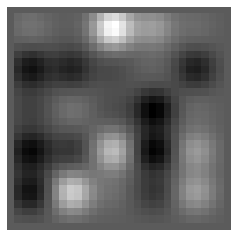

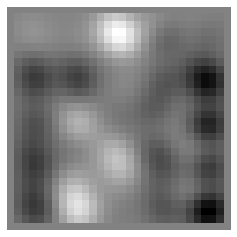

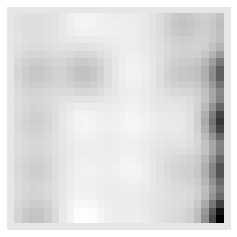

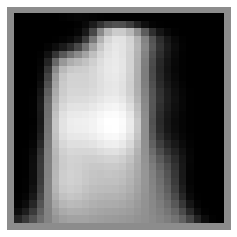

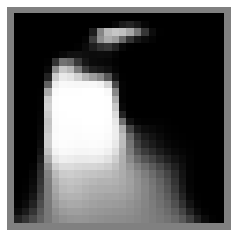

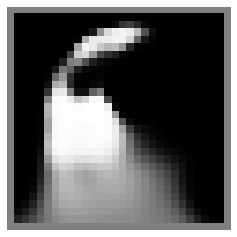

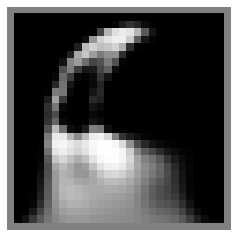

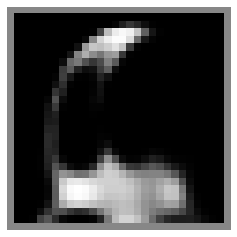

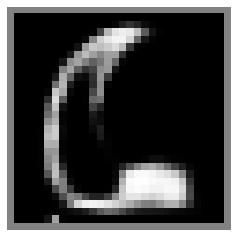

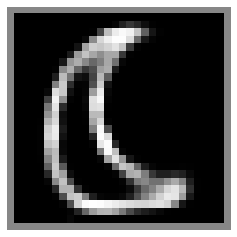

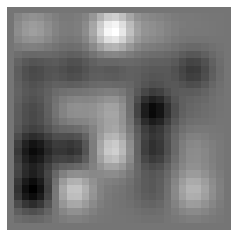

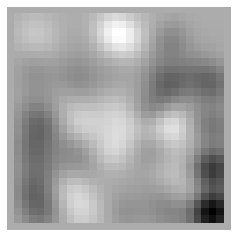

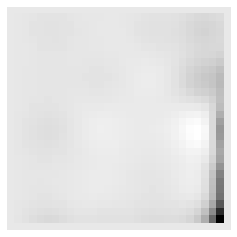

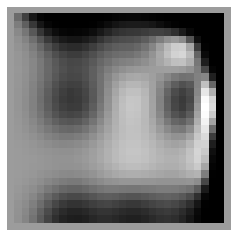

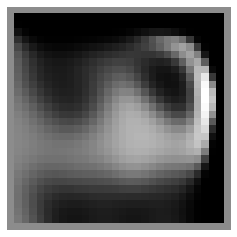

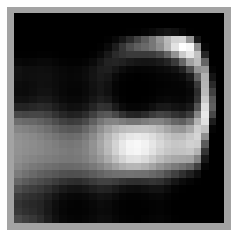

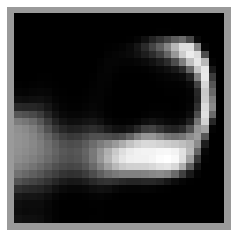

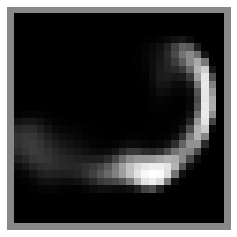

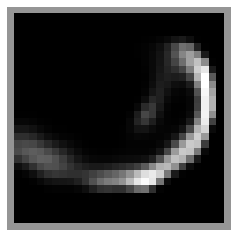

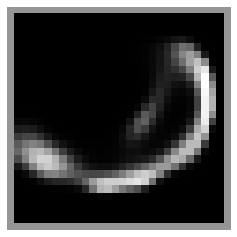

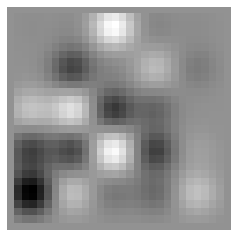

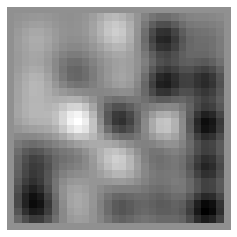

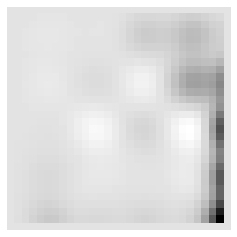

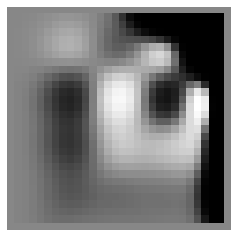

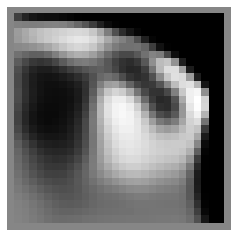

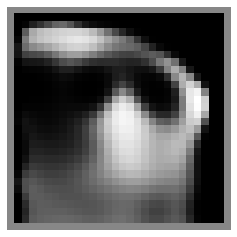

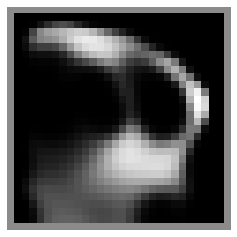

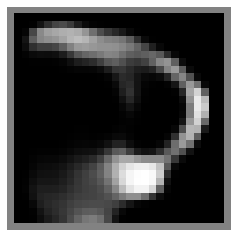

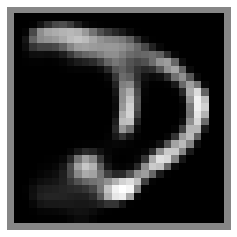

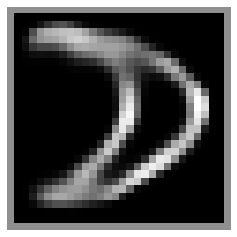

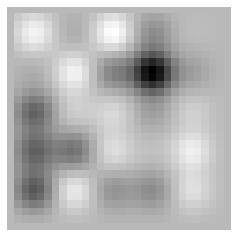

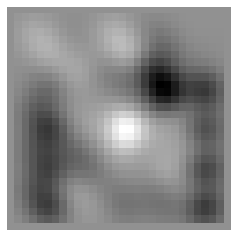

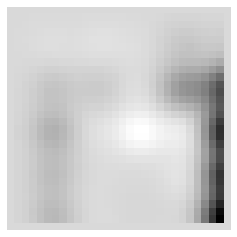

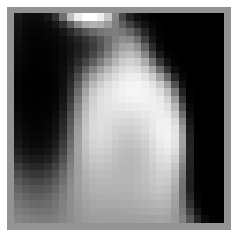

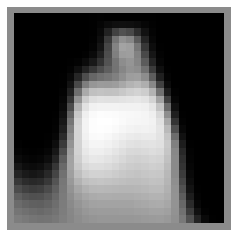

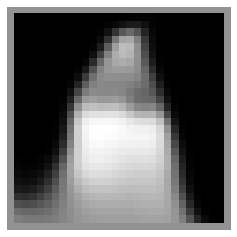

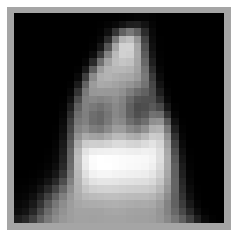

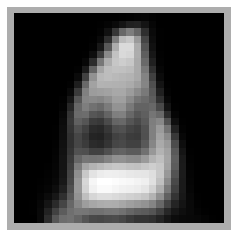

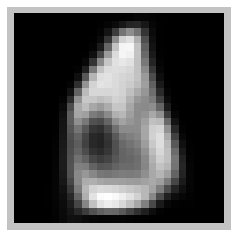

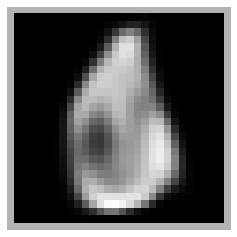

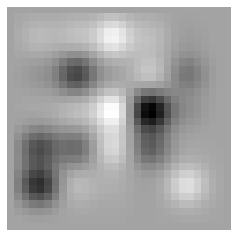

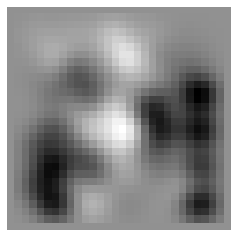

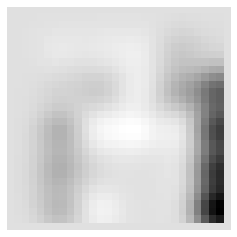

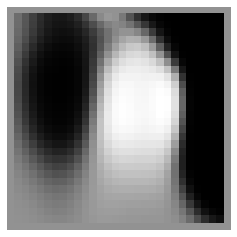

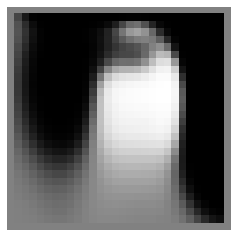

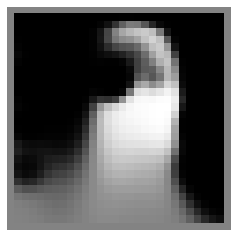

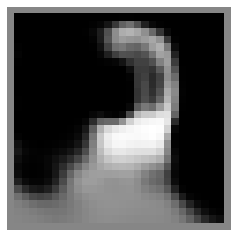

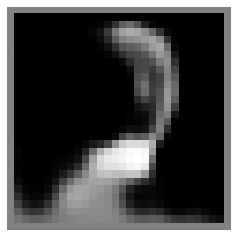

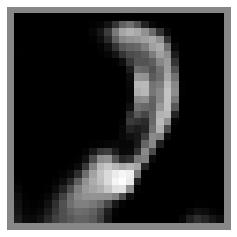

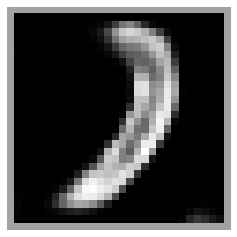

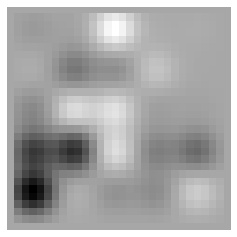

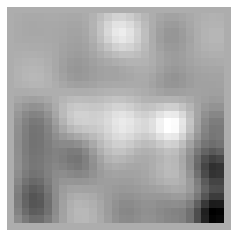

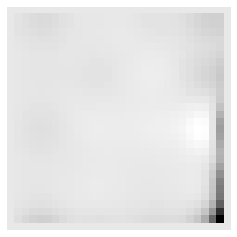

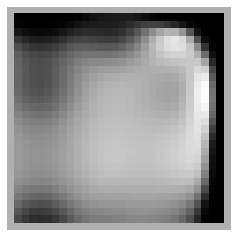

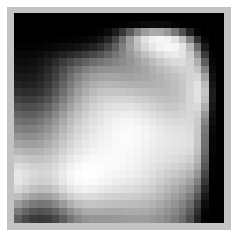

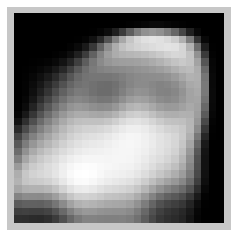

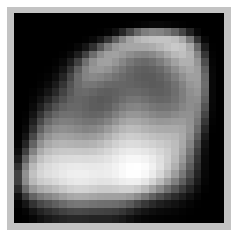

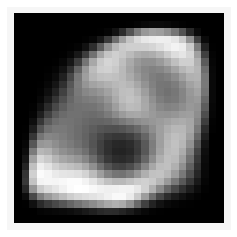

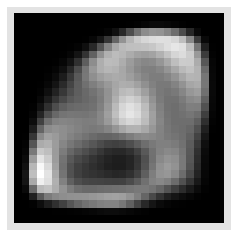

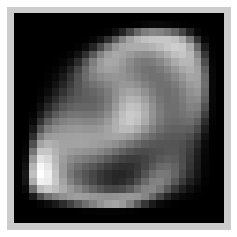

In [27]:
test()

## Idx Validation

In [28]:
# Loading model
model = load_model(T, A, B, batch_size, z_size, N, dec_size, enc_size, learning_rate, beta1, clip, path, category)
model.eval()

DRAW(
  (encoder): LSTMCell(306, 256)
  (mu_linear): Linear(in_features=256, out_features=10, bias=True)
  (sigma_linear): Linear(in_features=256, out_features=10, bias=True)
  (decoder): LSTMCell(10, 256)
  (dec_linear): Linear(in_features=256, out_features=5, bias=True)
  (dec_w_linear): Linear(in_features=256, out_features=25, bias=True)
  (sigmoid): Sigmoid()
)

In [29]:
batch_size = 64

In [30]:
print(x_train.shape)
print(x_test.shape)

(97328, 784)
(24333, 784)


In [31]:
print('There are ', len(npy_data), ' images in selected database')
print("Enter image index from 0 to", len(npy_data)-1, "to display and compare bitmap and raw images:")
index=int(input())

There are  121661  images in selected database
Enter image index from 0 to 121660 to display and compare bitmap and raw images:
0


In [32]:
def plot_bitmap():
    print("Bitmap image:")
    plt.imshow(npy_data[int(index)].reshape(28,28))
    plt.show()

def plot_raw():
    print("Raw image:")
    i = 0
    for stroke in ndjson_data[int(index)]['drawing']:
        stroke = np.array(stroke)
        plt.plot(stroke[0], stroke[1]*-1)
        i += 1
    plt.show()
    print('There are', i, 'number of strokes in this raw image file!')
    print('Image key id:', ndjson_data[int(index)]['key_id'])

Bitmap image:


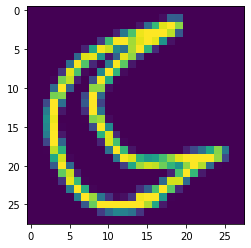

In [33]:
plot_bitmap()

Raw image:


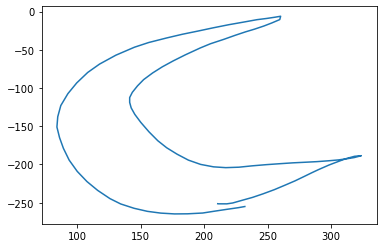

There are 1 number of strokes in this raw image file!
Image key id: 5431885159202816


In [34]:
plot_raw()

In [35]:
def validate():    
    print("validating...")
    img_loc = {'startr':0,
               'endr':30,
               'startc':0,
               'endc':30}   
    avg_loss = 0
    count = 0
    data = npy_data[index:index+64]
    data = np.reshape(data, (data.shape[0], 1, A, B))
    data = torch.Tensor(data)
    bs = data.size()[0]
    data = Variable(data).view(bs, -1)
    print('data.shape', data.shape)
    loss = model.loss(data)
    avg_loss += loss.cpu().data.numpy()
      
    
    xrecons_grid(batch_size, B, A, T, category, model, img_loc, count=0)

validating...
data.shape torch.Size([64, 784])
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\moon\moon_0_test_0.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\moon\moon_0_test_1.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\moon\moon_0_test_2.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\moon\moon_0_test_3.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\moon\moon_0_test_4.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\moon\moon_0_test_5.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\moon\moon_0_test_6.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\moon\moon_0_test_7.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\moon\moon_0_test_8.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\moon\moon_0_test_9.png


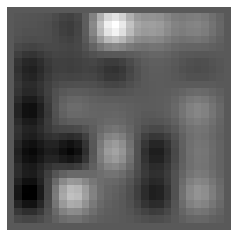

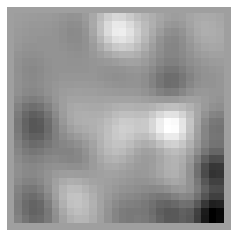

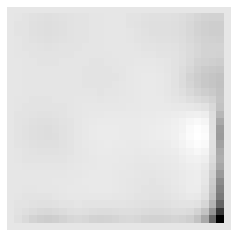

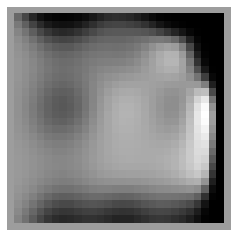

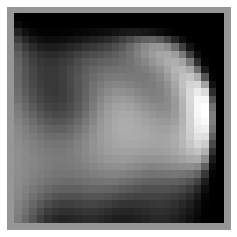

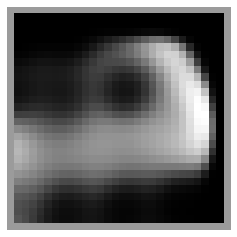

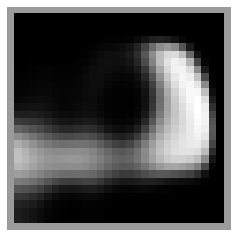

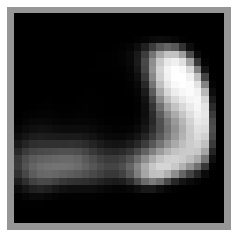

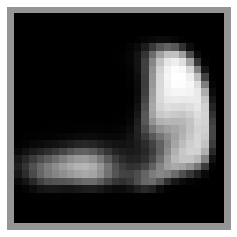

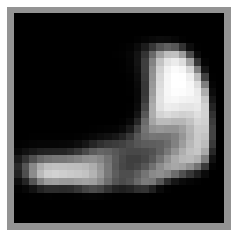

In [36]:
validate()